# **MACHINE LEARNING PROJECT**

> Erika Marinuzzi

Matricola: 2069971

- Load the dataset, exploit data visualization techniques (e.g., histograms) to understand the distribution of input and output variables, normalize/standardize the input variables (if required), use a weighted loss function or over/under-sampling techniques (if required), split the data into train/validation/test sets.
- Implement proper regression/classification models and justify your modeling choices.
- Tune the models’ hyperparameters using grid/random search and cross-validation.
- Evaluate and compare the models using proper evaluation metrics (e.g., accuracy, confusion matrices, ROC curves, etc.) and produce informative plots to visualize your results.

# **LOAD THE DATASET**


To start, I decided to import some useful libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import io
from google.colab import files

Before uploading the dataset, I modified the file format using excel. I used the function "Text to columns" to make it more clear and to be able to easily visualize the data in columns.
Then I uploaded the dataset from my local drive.

In [ ]:
uploaded = files.upload()

Saving Dataset_Stroke_mod.csv to Dataset_Stroke_mod.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset_Stroke_mod.csv']), delimiter=';')

I will print the summary and the type of variables to have a general idea of the dataframe

In [ ]:
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


The dataframe is characterized by different data types: integers represent entire numbers without a decimal point, floats are numbers with decimal points or scientific notation and objects are generic data.

Since it is not useful to train the model, I deleted the "id" variable.

In [ ]:
del df["id"]
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

**DEALING WITH MISSING DATA**

From the summary it is possible to see that there are some missing data identified as "NaN" values, so it is necessary to deal with them.

Firstly I want to identify all of them.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


The only missing values are the ones of the Body mass index, for a total of 201.

There are different ways to deal with them and one of the easiest would be deleting each line with the missing data.

Since I don't want to lose data, I decided to use "Imputation".
Through the function "SimpleImputer", I will use the mean value of the "bmi" column to replace the missing values with the mean of that column.

I will also print again the Dataframe to be sure that there are no more NaN values and that they have been successfully replaced.

In [ ]:
from sklearn.impute import SimpleImputer
missing_column = 'bmi'
imputer = SimpleImputer(strategy='mean')
df[missing_column]=imputer.fit_transform(df[[missing_column]])
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


All the missing values have been correctly substituted with the mean value, which is "28.893237".

# **DATA** **VISUALIZATION**


The dataset can be analyzed using classification techniques, in order to predict whether a patient is likely to get stroke based on several attributes.

The input variables 'x' for the model include all features in the dataframe except the last one. These features are: 'gender,' 'age,' 'hypertension,' 'heart_disease,' 'ever_married,' 'work_type,' 'residence_type,' 'avg_glucose_level,' 'bmi,' and 'smoking_status.' On the other hand, the last column, relating to the presence of a stroke will be the output variable 'y'.


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

I will use histogram as data visualization technique to understand the distribution of input and output variables.

First of all, I decided to visualize the output variable, to understand the distribution of stroke between individuals.

To do so, I used the library "seaborn", which is very useful to visualize categorical variables.
In fact, through the function "sns.countblot" is possible to count the categories in each variable and represent it graphically.

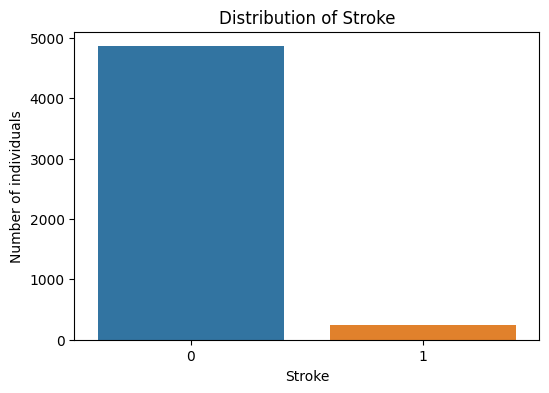

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='stroke')
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Number of individuals')
plt.show()

From the histogram it is possible to notice that the distribution of stroke is really umbalanced.

In [ ]:
count_class = np.bincount(y)
print("Individuals without stroke:", count_class[0])
print("Individuals with stroke:", count_class[1] )

percentage_0 = round(count_class[0]/ len(y)* 100)
percentage_1 = round(count_class[1]/ len(y)* 100)
print("Percentage class 0:", percentage_0)
print("Percentage class 1:", percentage_1)

Individuals without stroke: 4861
Individuals with stroke: 249
Percentage class 0: 95
Percentage class 1: 5


In particular, the class 0 (individuals that never had stroke), is characterized by the 95% of the individuals, while the class 1 only by the 5%

This could represent an significant problem for the model. In fact, if the dataset is not balanced, the model may tend to assign all subjects to class 0 and the accuaracy would still result high.

I will also visualize the numerical and the categorical input variables.

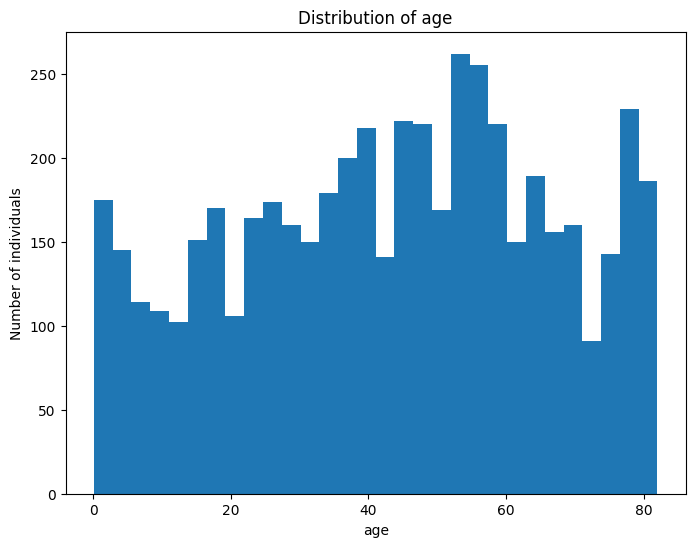

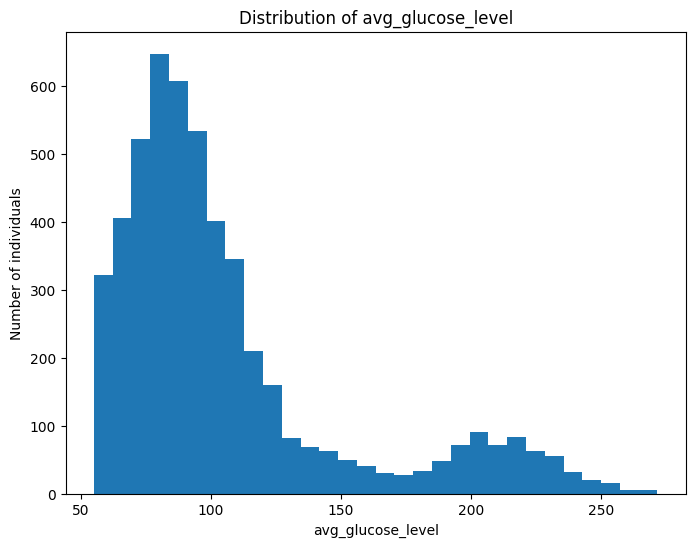

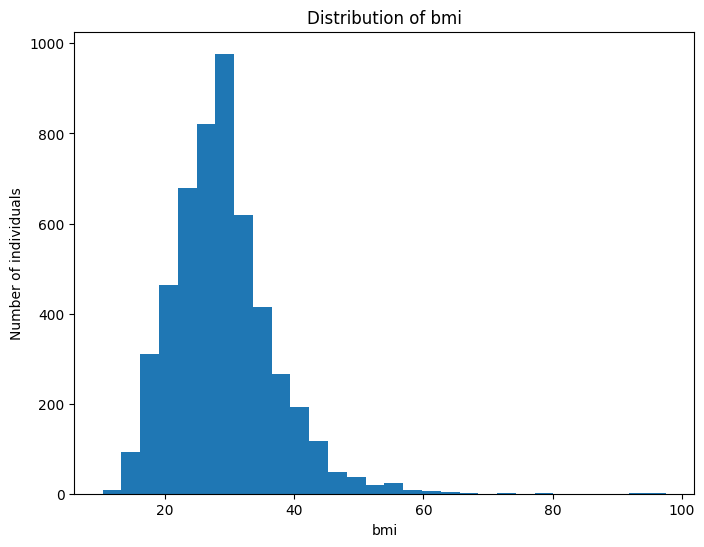

In [ ]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of individuals')
    plt.show()

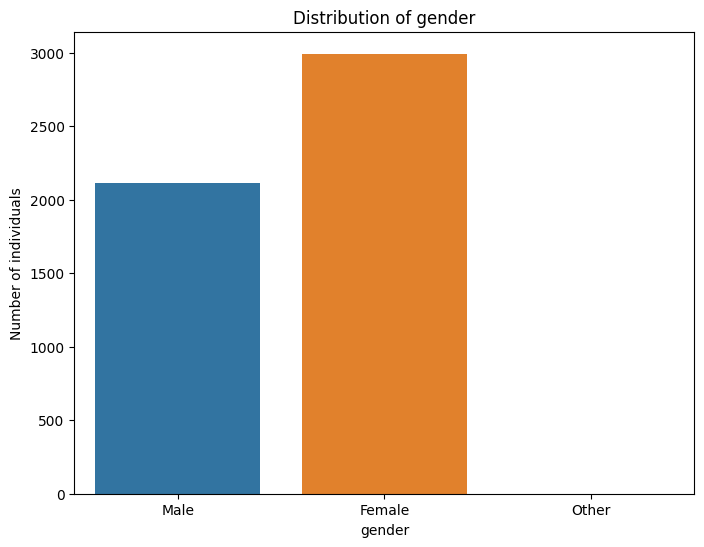

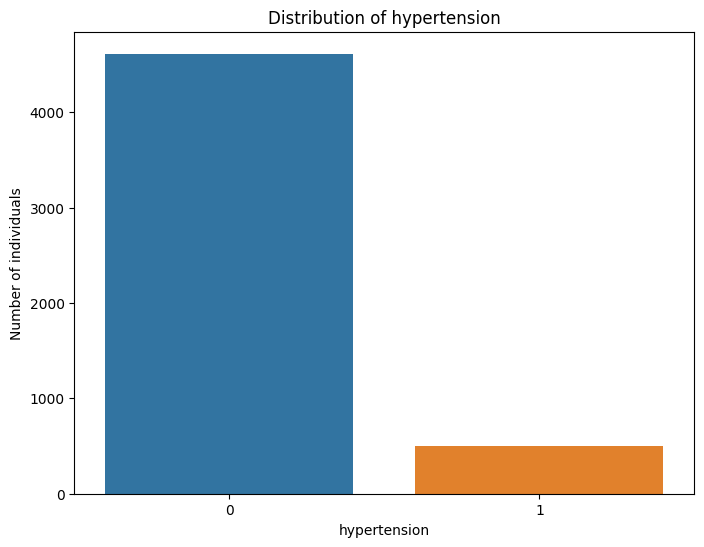

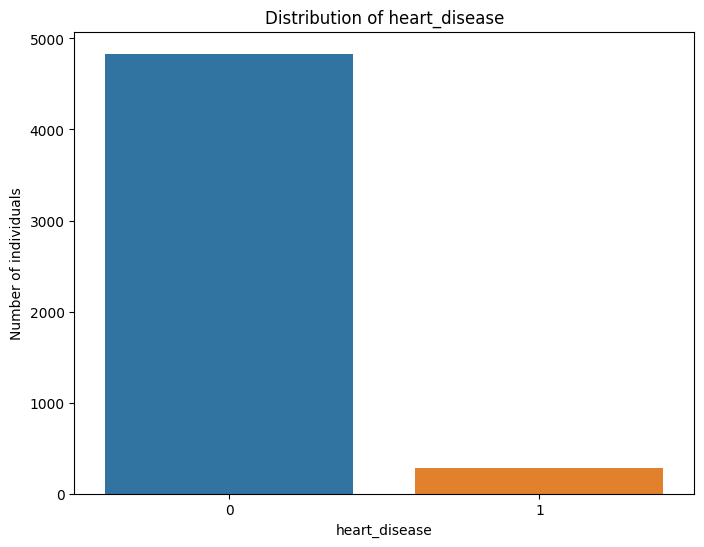

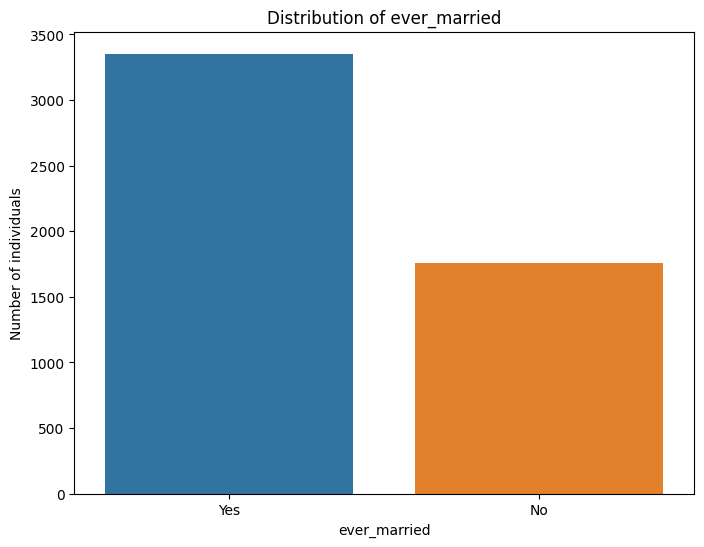

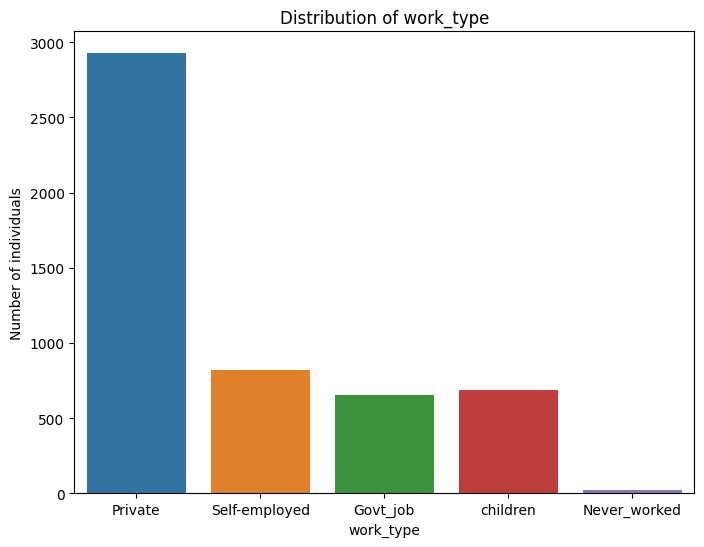

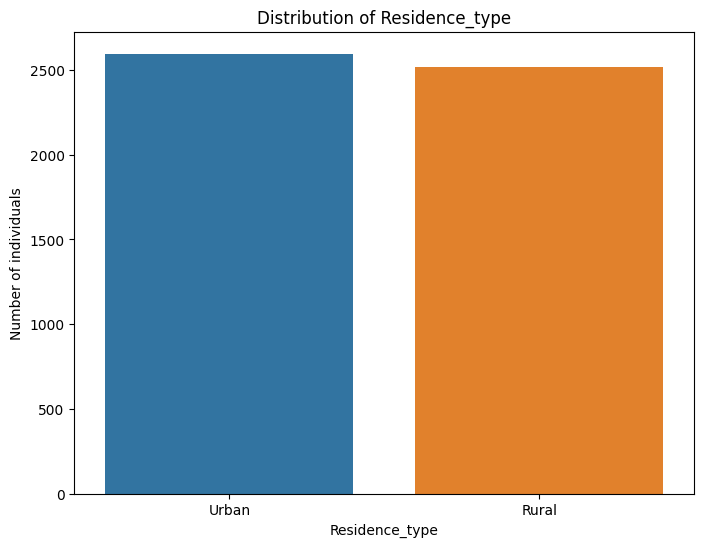

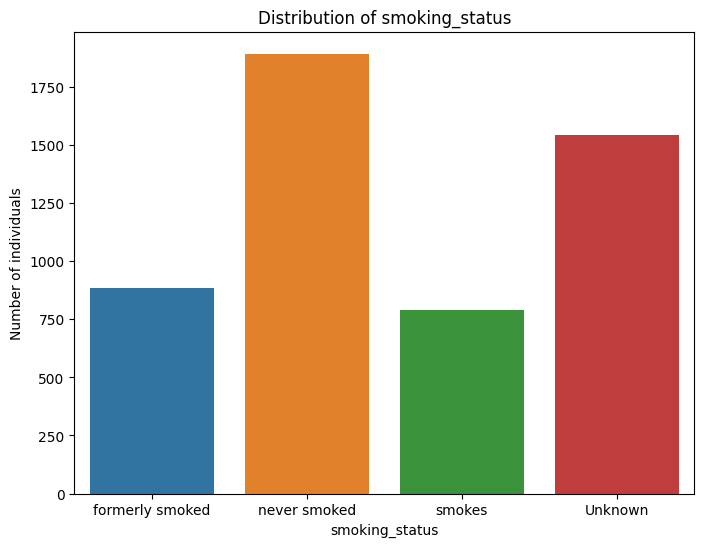

In [ ]:
categorical_variables =  ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for feature in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of individuals')
    plt.show()

An examination of the histograms provides a comprehensive overview of the distribution. For instance, the age distribution goes from a few months to over 80 years. It llustrates that the prevalence of hypertension and heart disease among individuals is relatively low. Additionally, further insights into the distribution of job types, marital status, smoking habits and the gender distribution are provided.

An important observation from the graphs is that the variables lack of standardization.

I then decided to convert the categorical variables defined as "object" into "integers", to be able to use them for the training. One of the easiest techniques is label encoding that simply consists in assigning each category to an arbitrary number. The variables that I need to convert are: gender, ever married, work type, residence type and smoking status.


In [ ]:
df['gender'].replace({'Male':1, 'Female':0, 'Other':2}, inplace=True)
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['work_type'].replace({'children': 0, 'Govt_job':1,'Never_worked': 2, 'Private':3,'Self-employed': 4}, inplace=True)
df['Residence_type'].replace({'Rural':0,  'Urban':1}, inplace=True)
df['smoking_status'].replace({'formerly smoked': 0,'never smoked': 1,'smokes': 2, 'Unknown':3}, inplace=True)
print(df.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


# **SPLIT THE DATA and STANDARDIZE**

I decided to split the dataset into **train**, **validation** and **test** set.

- 80% of the data will be used for the training (x_training, y_training) and 20% will be used at the end to the test the model (x_te, y_te).

- Furthermore, I also decided to subdivide the training dataset. In this case, 20% of the training data will be used for the validation (x_val, y_val) and the remaining 80% for the training (x_tr, y_tr).

In this way, the data from the test won't be used during the training and validation process.

The function below allows to automatically split the data.

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_te, y_training, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_training, y_training, test_size=0.2, random_state=42)


I decided to standardize the data after splitting the dataset in order to avoid the risk of overfitting. The "StandardScaler" function allows to standardize each column separately.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_training = sc.fit_transform(x_training)
x_val = sc.transform(x_val)
x_tr= sc.transform(x_tr)
x_te = sc.transform(x_te)

Now I will plot an histogram of the values of the first feature to be completely sure that they are centered at zero.

(array([271., 236., 280., 314., 388., 387., 422., 355., 254., 363.]),
 array([-1.9147045 , -1.5515048 , -1.18830511, -0.82510542, -0.46190572,
        -0.09870603,  0.26449367,  0.62769336,  0.99089305,  1.35409275,
         1.71729244]),
 <BarContainer object of 10 artists>)

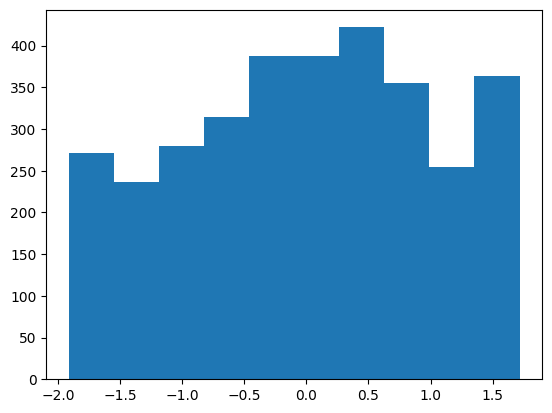

In [ ]:
plt.hist(x_tr[:,1])

# **CLASSIFICATION** **MODELS**

For my classification task I decided to use 7 different models.
- **Logistic regression** (model_logistic): is a linear model that is commonly used for classification problems. It is easy to implement and interpret. For this reason, it is usually used to provide a baseline comparison.
It utilizes the logistic or sigmoid function, which transforms output values into a range from 0 to 1, to find the best linear relationship between input and outcomes.

- **Support Vector Machines**: is a more powerful model that identifies a hyperplane whose distance to the nearest data points on each side is maximized. I decided to implement both the linear(linear kernel, model_svm_lin) and non-linear one (RBF kernel, model_svm_nonlin).

- **K-Nearest Neighbors** (model_knn): is a non-linear model that use an intuitive approach. It classifies data considering the position of the close points.

- **Decision Tree** (model_tree): is a non-linear model that is easy to intepret. The data are divided into subsets based on their key features.

- **Random Forest** (model_forest): is a non-linear ensemble method characterized by multiple decision trees. It combines their prediction to improve the overall model performance.

- **Gradient Boosting** (model_xgb): is another non-linear model that sequentially builds trees, each correcting the errors of the previous ones. It is powerful and is one of the models that usally produces high performance. On the other hand is really hard to interpret.

This selection allows a broader exploration of different algorithms, combining simpler and more interpretable models with more complex ones.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

I decided to first implement my models using their basic configurations.

In [ ]:
model_logistic = LogisticRegression(random_state=42).fit(x_tr, y_tr);
model_svm_lin = SVC(kernel="linear", probability=True, random_state=42).fit(x_tr, y_tr);
model_svm_nonlin = SVC(kernel="rbf", probability=True, random_state=42).fit(x_tr, y_tr);
model_knn = KNeighborsClassifier().fit(x_tr, y_tr);
model_tree = DecisionTreeClassifier(random_state=42).fit(x_tr, y_tr);
model_forest = RandomForestClassifier(random_state=42).fit(x_tr, y_tr);
model_xgb = GradientBoostingClassifier(random_state=42).fit(x_tr, y_tr);


To evaluate them I will use the **accuracy**. This metric measures the overall correctness of predictions made by the model.

In [ ]:
print("ACCURACY:")
print("\t\t TR \t VAL")
print("Logistic acc:\t %.2f\t %.2f" % (model_logistic.score(x_tr, y_tr), model_logistic.score(x_val, y_val)))
print("SVM-lin acc:\t %.2f\t %.2f" % (model_svm_lin.score(x_tr, y_tr), model_svm_lin.score(x_val, y_val)))
print("SVM-RBF acc:\t %.2f\t %.2f" % (model_svm_nonlin.score(x_tr, y_tr), model_svm_nonlin.score(x_val, y_val)))
print("K-NN acc:\t %.2f\t %.2f" % (model_knn.score(x_tr, y_tr), model_knn.score(x_val, y_val)))
print("Tree acc:\t %.2f\t %.2f" % (model_tree.score(x_tr, y_tr), model_tree.score(x_val, y_val)))
print("Forest acc:\t %.2f\t %.2f" % (model_forest.score(x_tr, y_tr), model_forest.score(x_val, y_val)))
print("Xgb acc:\t %.2f\t %.2f" % (model_xgb.score(x_tr, y_tr), model_xgb.score(x_val, y_val)))


ACCURACY:
		 TR 	 VAL
Logistic acc:	 0.95	 0.95
SVM-lin acc:	 0.95	 0.95
SVM-RBF acc:	 0.95	 0.95
K-NN acc:	 0.96	 0.95
Tree acc:	 1.00	 0.90
Forest acc:	 1.00	 0.95
Xgb acc:	 0.96	 0.95


The accuracy appears to be quite high, which might initially seem promising. However, the context is important to consider. Given the highly imbalanced nature of the dataset, where the majority (95%) belongs to the class without stroke (class 0), the model tends to assign a substantial portion of cases to class 0, giving less relevance to class 1 (presence of stroke).

To address this imbalance and to have a more comprehensive understanding, I will assess the model's performance using additional metrics such as the confusion matrix, f1 score, recall, ROC curve and AUC score.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

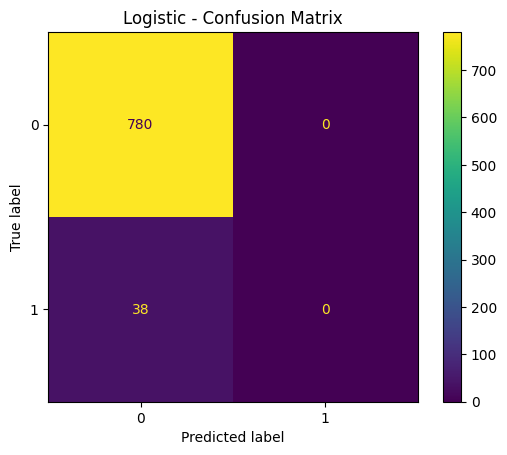

Recall: 0.0
F1 Score: 0.0


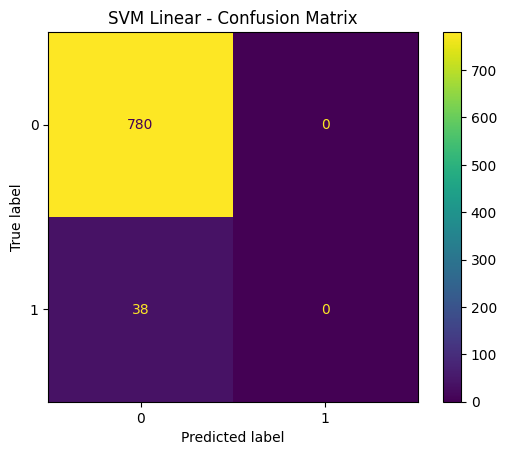

Recall: 0.0
F1 Score: 0.0


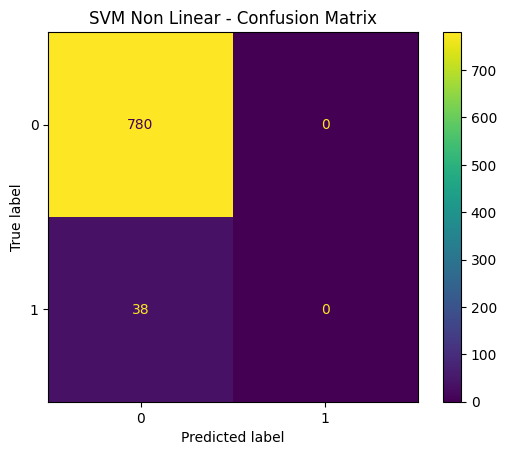

Recall: 0.0
F1 Score: 0.0


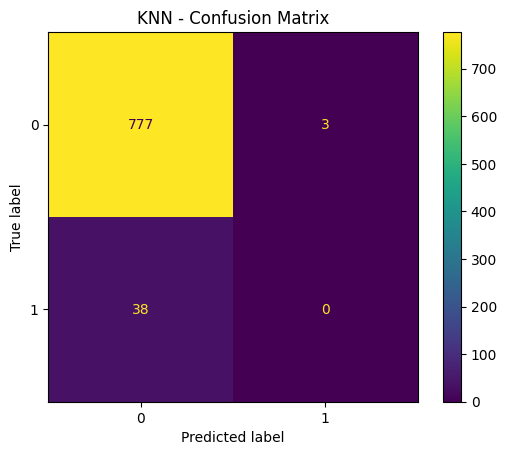

Recall: 0.0
F1 Score: 0.0


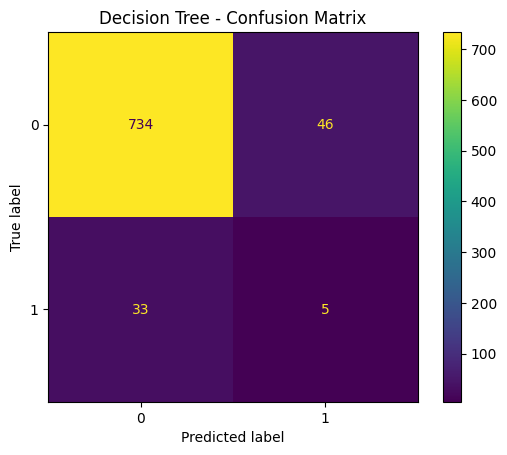

Recall: 0.13157894736842105
F1 Score: 0.11235955056179775


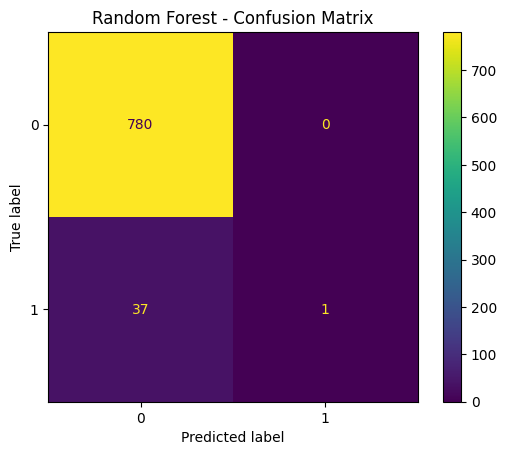

Recall: 0.02631578947368421
F1 Score: 0.05128205128205127


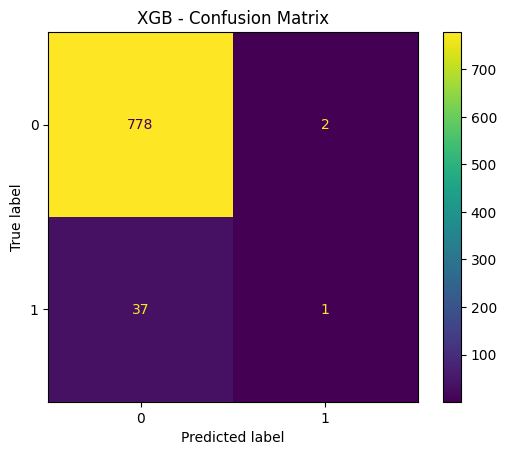

Recall: 0.02631578947368421
F1 Score: 0.048780487804878044


In [ ]:
y_pred_log = model_logistic.predict(x_val)
cm_log = confusion_matrix(y_val,y_pred_log)
cm_display_log = ConfusionMatrixDisplay(cm_log).plot()
plt.title('Logistic - Confusion Matrix')
plt.show()

recall_log = recall_score(y_val,y_pred_log)
f1_log = f1_score(y_val,y_pred_log)
print("Recall:", recall_log)
print("F1 Score:", f1_log)


y_pred_svm_lin = model_svm_lin.predict(x_val)
cm_svm_lin= confusion_matrix(y_val,y_pred_svm_lin)
cm_display_svm_lin = ConfusionMatrixDisplay(cm_svm_lin).plot()
plt.title('SVM Linear - Confusion Matrix')
plt.show()

recall_svm_lin = recall_score(y_val,y_pred_svm_lin)
f1_svm_lin = f1_score(y_val,y_pred_svm_lin)
print("Recall:", recall_svm_lin)
print("F1 Score:", f1_svm_lin)


y_pred_svm_nonlin = model_svm_nonlin.predict(x_val)
cm_svm_nonlin= confusion_matrix(y_val,y_pred_svm_nonlin)
cm_display_svm_nonlin = ConfusionMatrixDisplay(cm_svm_nonlin).plot()
plt.title('SVM Non Linear - Confusion Matrix')
plt.show()

recall_svm_nonlin = recall_score(y_val,y_pred_svm_nonlin)
f1_svm_nonlin = f1_score(y_val,y_pred_svm_nonlin)
print("Recall:", recall_svm_nonlin)
print("F1 Score:", f1_svm_nonlin)


y_pred_knn = model_knn.predict(x_val)
cm_knn = confusion_matrix(y_val,y_pred_knn)
cm_display_knn = ConfusionMatrixDisplay(cm_knn).plot()
plt.title('KNN - Confusion Matrix')
plt.show()

recall_knn = recall_score(y_val,y_pred_knn)
f1_knn = f1_score(y_val,y_pred_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


y_pred_tree = model_tree.predict(x_val)
cm_tree = confusion_matrix(y_val,y_pred_tree)
cm_display_tree = ConfusionMatrixDisplay(cm_tree).plot()
plt.title('Decision Tree - Confusion Matrix')
plt.show()

recall_tree = recall_score(y_val,y_pred_tree)
f1_tree = f1_score(y_val,y_pred_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)


y_pred_forest = model_forest.predict(x_val)
cm_forest = confusion_matrix(y_val,y_pred_forest)
cm_display_forest = ConfusionMatrixDisplay(cm_forest).plot()
plt.title('Random Forest - Confusion Matrix')
plt.show()

recall_forest = recall_score(y_val,y_pred_forest)
f1_forest = f1_score(y_val,y_pred_forest)
print("Recall:", recall_forest)
print("F1 Score:", f1_forest)


y_pred_xgb = model_xgb.predict(x_val)
cm_xgb = confusion_matrix(y_val,y_pred_xgb)
cm_display_xbg = ConfusionMatrixDisplay(cm_xgb).plot()
plt.title('XGB - Confusion Matrix')
plt.show()

recall_xgb = recall_score(y_val,y_pred_xgb)
f1_xgb = f1_score(y_val,y_pred_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

The code above generated predictions (y_pred) using the different models on the validation set (x_val). Then, a confusion matrix (cm) is computed by comparing the predicted labels (y_pred) with the true labels (y_val).
Trough the **Confusion Matrix** is possible to easily summarize and visualize the performance.  It is divided into four categories: true positive (correctly predicted positive), true negative (correctly predicted negative), false positive (incorrectly predicted positive), and false negative (incorrectly predicted negative).

As predicted, the confusion matrix shows a high number of true positive, a notable number of false negative and 0 (or close to 0) true negative. This means that almost all the data that truly belonged to the negative class were incorrectly predicted as positive.

**Recall** (Sensitivity or True Positive Rate) is the ratio between the true positive and the sum of true positive and false negative.

**F1 Score**  considers both false positives and false negatives and combines both precision and recall into a single value.
It is really useful when the distribution is unbalanced.

For both, the range goes from 0 to 1, where 0 indicates poor performance.
All the classifiers are close to 0 for both F1 and recall, which means that the models are classifying every case as class 0 and misclassifying all the cases of class 1.


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
y_logistic_pred = model_logistic.predict_proba(x_val)[::,1]
y_svm_lin_pred = model_svm_lin.predict_proba(x_val)[::,1]
y_svm_nonlin_pred = model_svm_nonlin.predict_proba(x_val)[::,1]
y_knn_pred = model_knn.predict_proba(x_val)[::,1]
y_tree_pred = model_tree.predict_proba(x_val)[::,1]
y_forest_pred = model_forest.predict_proba(x_val)[::,1]
y_xgb_pred = model_xgb.predict_proba(x_val)[::,1]

y_PRED = [y_logistic_pred, y_svm_lin_pred, y_svm_nonlin_pred, y_knn_pred, y_tree_pred, y_forest_pred, y_xgb_pred]

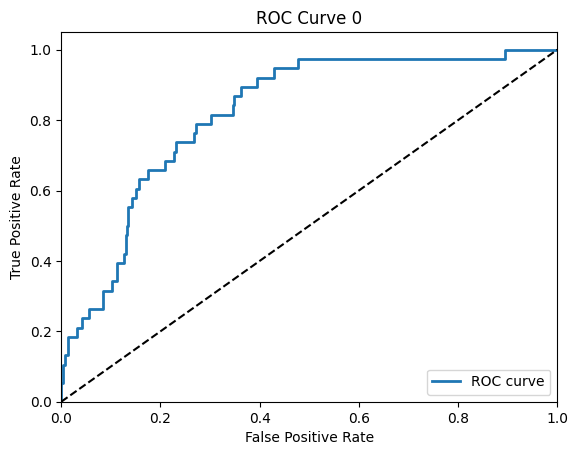

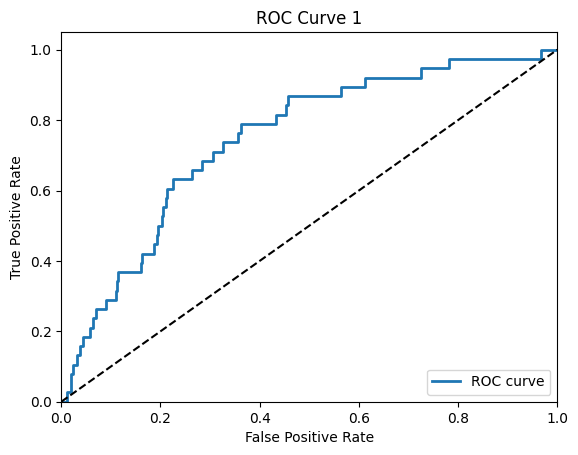

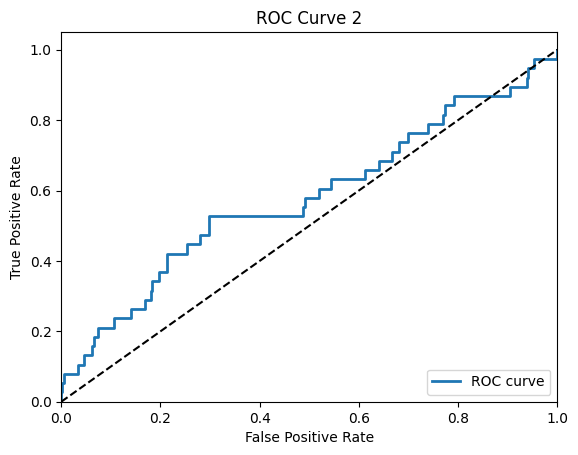

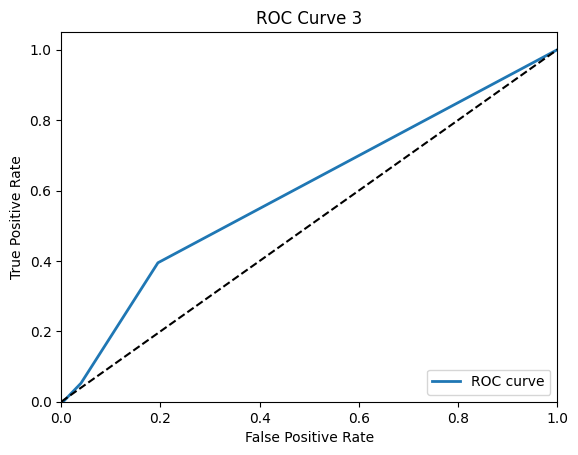

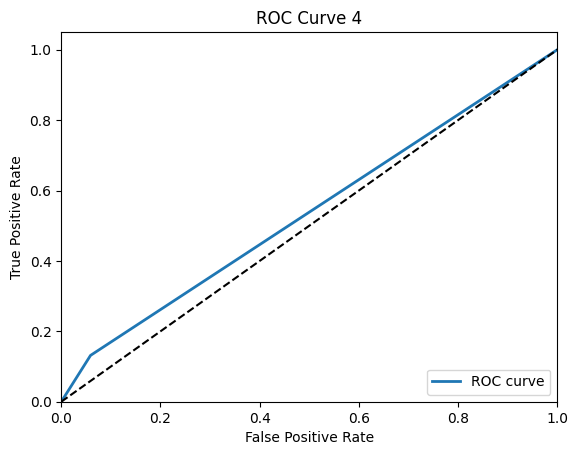

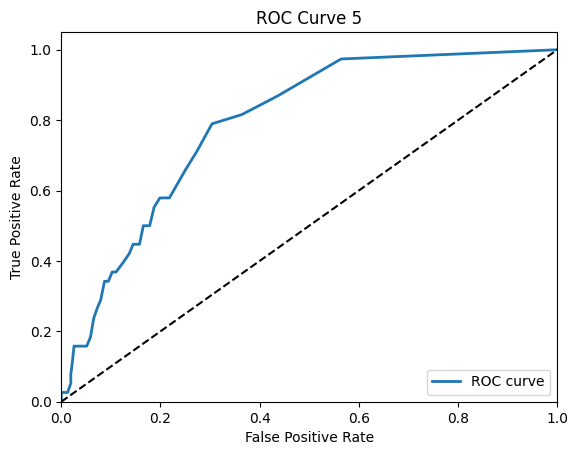

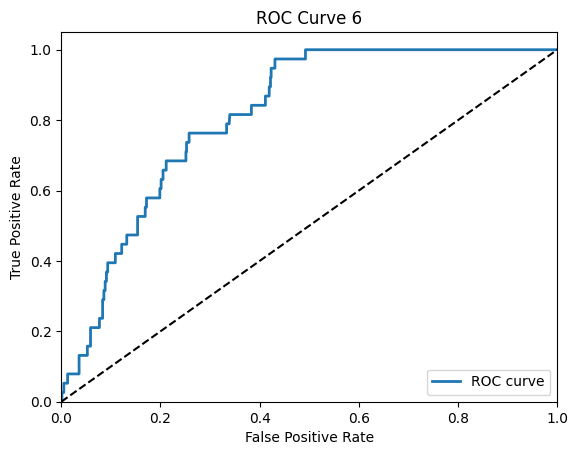

In [ ]:
fpr_logistic = dict()
fpr_svm_lin = dict()
fpr_svm_non_lin = dict()
fpr_knn = dict()
fpr_tree = dict()
fpr_forest = dict()
fpr_xgb= dict()

FPR = [fpr_logistic, fpr_svm_lin, fpr_svm_non_lin, fpr_knn, fpr_tree, fpr_forest, fpr_xgb]

tpr_logistic = dict()
tpr_svm_lin = dict()
tpr_svm_non_lin = dict()
tpr_knn = dict()
tpr_tree = dict()
tpr_forest = dict()
tpr_xgb= dict()

TPR = [tpr_logistic, tpr_svm_lin, tpr_svm_non_lin, tpr_knn, tpr_tree, tpr_forest, fpr_xgb]

for i in range(7):
    FPR[i], TPR[i], _ = roc_curve(y_val, y_PRED[i])
    plt.plot(FPR[i], TPR[i], lw=2, label="ROC curve")

    plt.plot([0, 1], [0, 1], color="k", linestyle="--") # show random baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve {}".format(i))
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

for i in range(7):
  auc_score = roc_auc_score(y_val, y_PRED[i])
  print("AUC Score {}".format(i), auc_score)

AUC Score 0 0.819804318488529
AUC Score 1 0.7458502024291497
AUC Score 2 0.5797570850202429
AUC Score 3 0.5971153846153847
AUC Score 4 0.536302294197031
AUC Score 5 0.7902834008097166
AUC Score 6 0.8129385964912279


**ROC Curve** (Receiver Operating Characteristic Curve): it is a graphical representation that helps to visualize the trade-off between true positive and false positive rate at various thresholds.

**AUC** (Area Under the Curve): it provides a single value that summarizes the ability of the model to distinguish between classes. A higher AUC indicates better discrimination performance, with a maximum value of 1.


AUC Score 0: Logistic Regression

AUC Score 1: Linear Support Vector Machine

AUC Score 2: Non-Linear Support Vector Machine

AUC Score 3: K-Nearest Neighbors

AUC Score 4: Decision Tree

AUC Score 5: Random forest

AUC Score 6: Gradient Boosting

For the moment the models with the highest AUC score are the logistic, the linear svm, the random forest and gradient boosting model. While the others are at a chance level.

# **WEIGHTED LOSS FUNCTION**

I have decided to use the weighted loss function to improve the performance and address the imbalanced dataset. I set class_weight='balanced' for most of the models, except for KNN and XGBoost. Using class_weight='balanced' the algorithm automatically adjusts the weights assigned to classes during training to be inversely
proportional to the class frequencies, giving more importance to the minority class.

The K-Nearest Neighbors and XGBoost don't directly support a weighted loss function. In the case of KNN, I utilized the 'distance' parameter for the 'weights' option. This choice adjusts the influence of neighbors based on their distances.
For XGBoost, I decided to don't balance the model.

Then I computed all the evaluation metrics discussed before to briefly evaluate the models.

In [ ]:
model_logistic_bal = LogisticRegression(class_weight='balanced', random_state=42).fit(x_tr, y_tr)
model_svm_lin_bal = SVC(kernel="linear", probability=True, class_weight='balanced', random_state=42).fit(x_tr, y_tr)
model_svm_nonlin_bal = SVC(kernel="rbf", probability=True, class_weight='balanced', random_state=42).fit(x_tr, y_tr)
model_knn_bal = KNeighborsClassifier(weights='distance').fit(x_tr, y_tr)
model_tree_bal = DecisionTreeClassifier(class_weight='balanced', random_state=42).fit(x_tr, y_tr)
model_forest_bal = RandomForestClassifier(class_weight='balanced', random_state=42).fit(x_tr, y_tr)

In [ ]:
print("\t ACCURACY \t TR \t VAL")
print("Log accuracy bal:\t %.2f\t %.2f" % (model_logistic_bal.score(x_tr, y_tr), model_logistic_bal.score(x_val, y_val)))
print("SVM-lin accuracy bal:\t %.2f\t %.2f" % (model_svm_lin_bal.score(x_tr, y_tr), model_svm_lin_bal.score(x_val, y_val)))
print("SVM-RBF accuracy bal:\t %.2f\t %.2f" % (model_svm_nonlin_bal.score(x_tr, y_tr), model_svm_nonlin_bal.score(x_val, y_val)))
print("K-NN accuracy bal:\t %.2f\t %.2f" % (model_knn_bal.score(x_tr, y_tr), model_knn_bal.score(x_val, y_val)))
print("Tree accuracy bal:\t %.2f\t %.2f" % (model_tree_bal.score(x_tr, y_tr), model_tree_bal.score(x_val, y_val)))
print("Forest accuracy bal:\t %.2f\t %.2f" % (model_forest_bal.score(x_tr, y_tr), model_forest_bal.score(x_val, y_val)))

	 ACCURACY 	 TR 	 VAL
Log accuracy bal:	 0.74	 0.73
SVM-lin accuracy bal:	 0.73	 0.71
SVM-RBF accuracy bal:	 0.81	 0.78
K-NN accuracy bal:	 1.00	 0.95
Tree accuracy bal:	 1.00	 0.92
Forest accuracy bal:	 1.00	 0.95


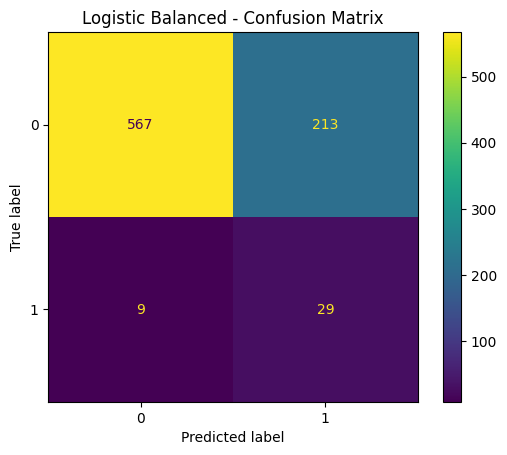

Recall: 0.7631578947368421
F1 Score: 0.20714285714285716


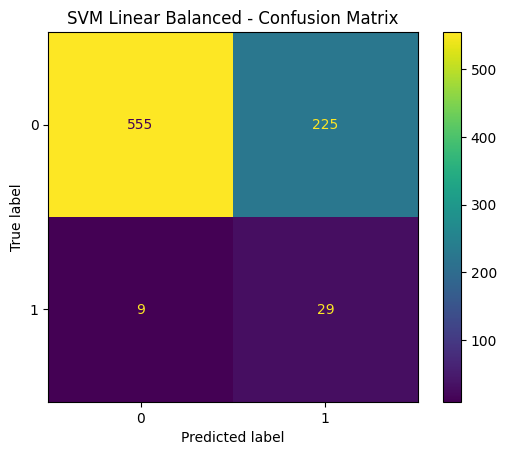

Recall: 0.7631578947368421
F1 Score: 0.19863013698630136


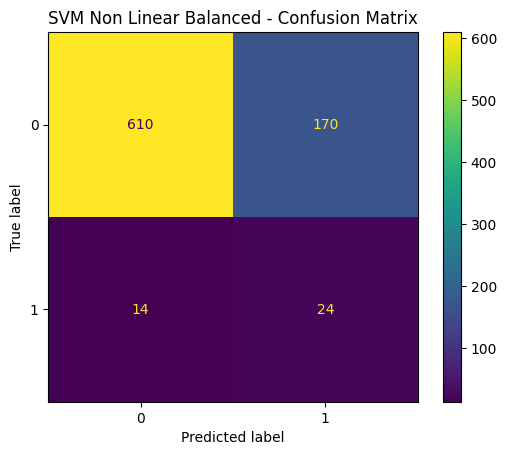

Recall: 0.631578947368421
F1 Score: 0.20689655172413793


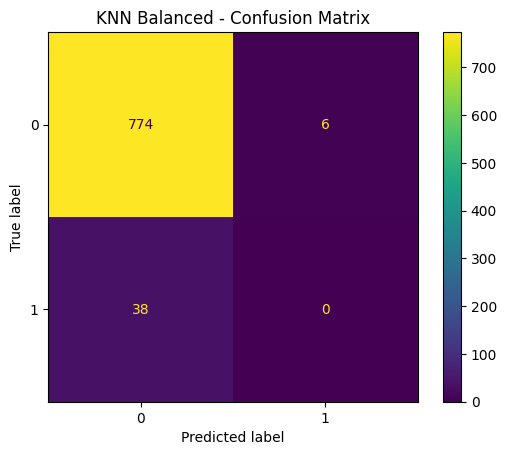

Recall: 0.0
F1 Score: 0.0


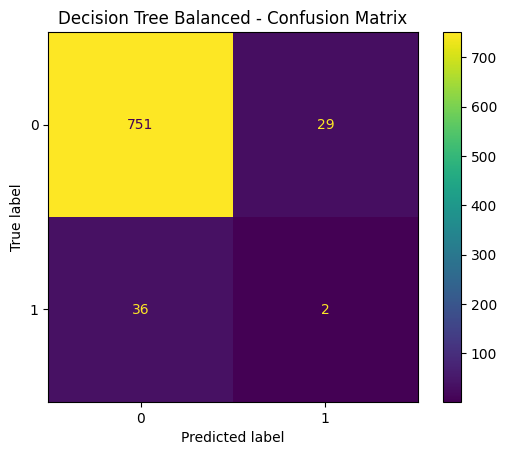

Recall: 0.05263157894736842
F1 Score: 0.05797101449275362


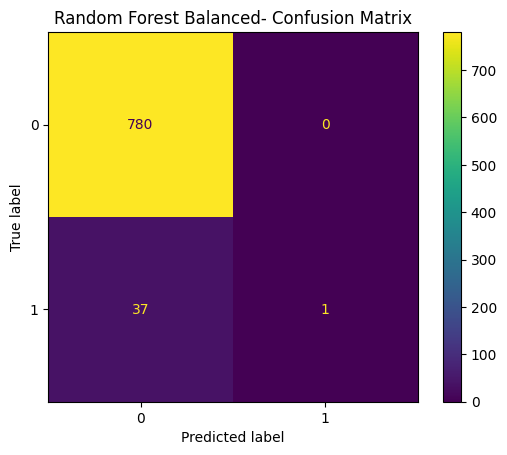

Recall: 0.02631578947368421
F1 Score: 0.05128205128205127


In [ ]:
y_pred_log_bal = model_logistic_bal.predict(x_val)
cm_log_bal = confusion_matrix(y_val,y_pred_log_bal)
cm_display_log_bal = ConfusionMatrixDisplay(cm_log_bal).plot()
plt.title('Logistic Balanced - Confusion Matrix')
plt.show()

recall_log_bal = recall_score(y_val,y_pred_log_bal)
f1_log_bal = f1_score(y_val,y_pred_log_bal)
print("Recall:", recall_log_bal)
print("F1 Score:", f1_log_bal)


y_pred_svm_lin_bal = model_svm_lin_bal.predict(x_val)
cm_svm_lin_bal= confusion_matrix(y_val,y_pred_svm_lin_bal)
cm_display_svm_lin_bal = ConfusionMatrixDisplay(cm_svm_lin_bal).plot()
plt.title('SVM Linear Balanced - Confusion Matrix')
plt.show()

recall_svm_lin_bal = recall_score(y_val,y_pred_svm_lin_bal)
f1_svm_lin_bal = f1_score(y_val,y_pred_svm_lin_bal)
print("Recall:", recall_svm_lin_bal)
print("F1 Score:", f1_svm_lin_bal)


y_pred_svm_nonlin_bal = model_svm_nonlin_bal.predict(x_val)
cm_svm_nonlin_bal= confusion_matrix(y_val,y_pred_svm_nonlin_bal)
cm_display_svm_nonlin_bal = ConfusionMatrixDisplay(cm_svm_nonlin_bal).plot()
plt.title('SVM Non Linear Balanced - Confusion Matrix')
plt.show()

recall_svm_nonlin_bal = recall_score(y_val,y_pred_svm_nonlin_bal)
f1_svm_nonlin_bal = f1_score(y_val,y_pred_svm_nonlin_bal)
print("Recall:", recall_svm_nonlin_bal)
print("F1 Score:", f1_svm_nonlin_bal)


y_pred_knn_bal = model_knn_bal.predict(x_val)
cm_knn_bal= confusion_matrix(y_val,y_pred_knn_bal)
cm_display_knn_bal = ConfusionMatrixDisplay(cm_knn_bal).plot()
plt.title('KNN Balanced - Confusion Matrix')
plt.show()

recall_knn_bal = recall_score(y_val,y_pred_knn_bal)
f1_knn_bal = f1_score(y_val,y_pred_knn_bal)
print("Recall:", recall_knn_bal)
print("F1 Score:", f1_knn_bal)

y_pred_tree_bal = model_tree_bal.predict(x_val)
cm_tree_bal = confusion_matrix(y_val,y_pred_tree_bal)
cm_display_tree_bal = ConfusionMatrixDisplay(cm_tree_bal).plot()
plt.title('Decision Tree Balanced - Confusion Matrix')
plt.show()

recall_tree_bal = recall_score(y_val,y_pred_tree_bal)
f1_tree_bal = f1_score(y_val,y_pred_tree_bal)
print("Recall:", recall_tree_bal)
print("F1 Score:", f1_tree_bal)


y_pred_forest_bal = model_forest_bal.predict(x_val)
cm_forest_bal = confusion_matrix(y_val,y_pred_forest_bal)
cm_display_forest_bal = ConfusionMatrixDisplay(cm_forest_bal).plot()
plt.title('Random Forest Balanced- Confusion Matrix')
plt.show()

recall_forest_bal = recall_score(y_val,y_pred_forest_bal)
f1_forest_bal = f1_score(y_val,y_pred_forest_bal)
print("Recall:", recall_forest_bal)
print("F1 Score:", f1_forest_bal)

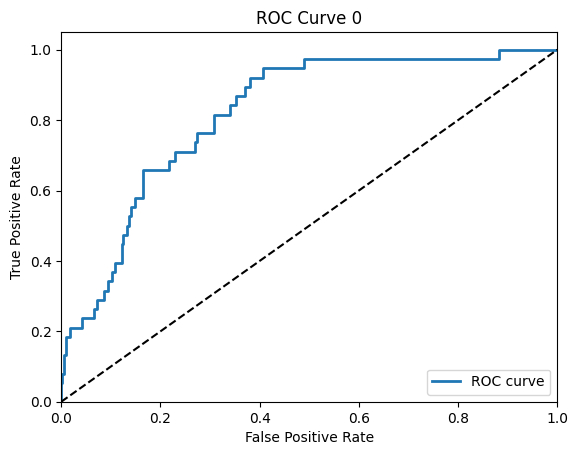

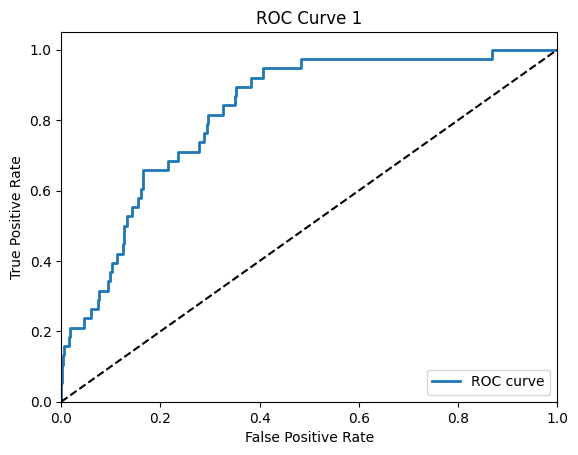

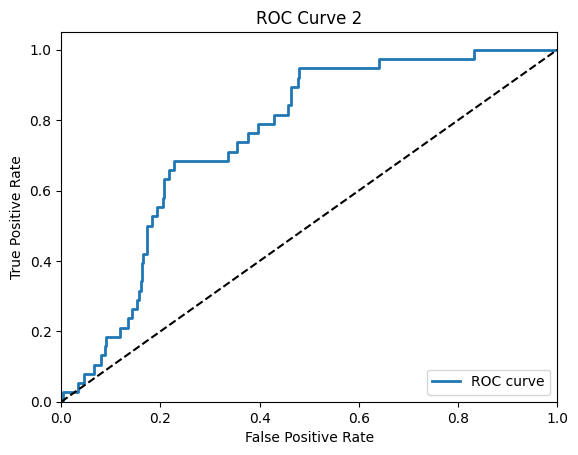

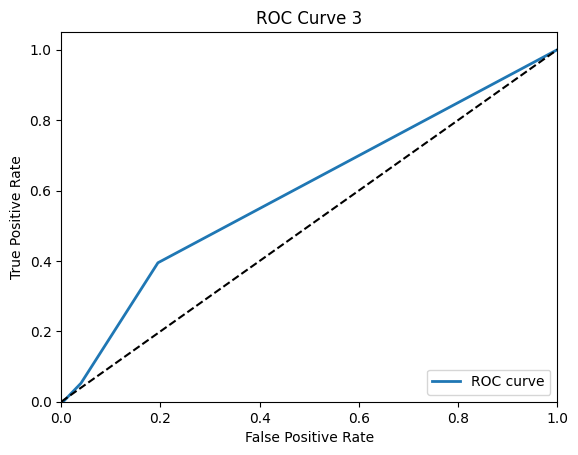

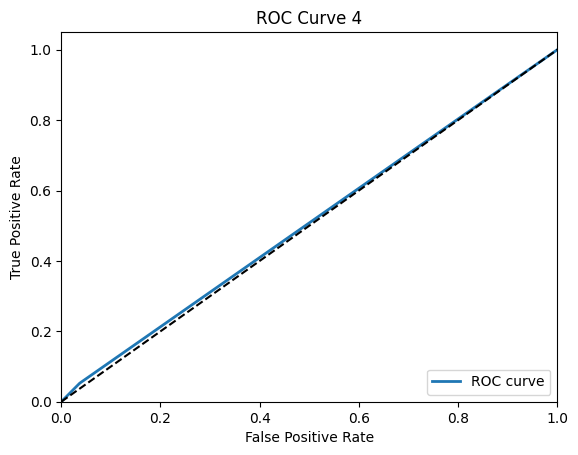

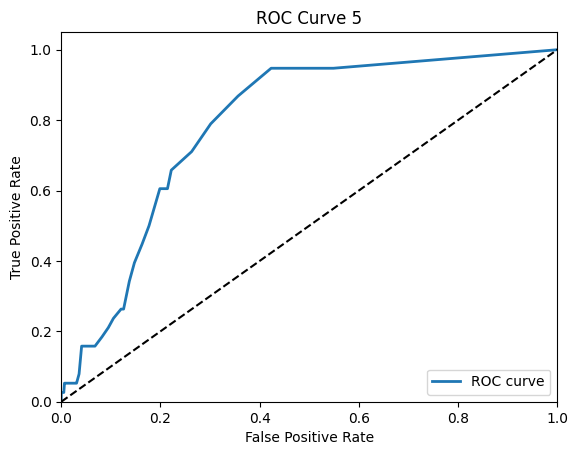

In [ ]:
y_logistic_bal_pred = model_logistic_bal.predict_proba(x_val)[::,1]
y_svm_lin_bal_pred = model_svm_lin_bal.predict_proba(x_val)[::,1]
y_svm_nonlin_bal_pred = model_svm_nonlin_bal.predict_proba(x_val)[::,1]
y_knn_pred_bal = model_knn_bal.predict_proba(x_val)[::,1]
y_tree_bal_pred = model_tree_bal.predict_proba(x_val)[::,1]
y_forest_bal_pred = model_forest_bal.predict_proba(x_val)[::,1]

y_bal_PRED = [y_logistic_bal_pred, y_svm_lin_bal_pred, y_svm_nonlin_bal_pred, y_knn_pred, y_tree_bal_pred, y_forest_bal_pred]

fpr_logistic_bal = dict()
fpr_svm_lin_bal = dict()
fpr_svm_non_lin_bal = dict()
fpr_knn_bal = dict()
fpr_tree_bal = dict()
fpr_forest_bal = dict()

FPR_bal = [fpr_logistic_bal, fpr_svm_lin_bal, fpr_svm_non_lin_bal, fpr_knn_bal, fpr_tree_bal, fpr_forest_bal]

tpr_logistic_bal = dict()
tpr_svm_lin_bal = dict()
tpr_svm_non_lin_bal = dict()
tpr_knn_bal = dict()
tpr_tree_bal = dict()
tpr_forest_bal = dict()

TPR_bal = [tpr_logistic_bal, tpr_svm_lin_bal, tpr_svm_non_lin_bal, tpr_knn_bal, tpr_tree_bal, tpr_forest_bal]

for i in range(6):
    FPR_bal[i], TPR_bal[i], _ = roc_curve(y_val, y_bal_PRED[i])
    plt.plot(FPR_bal[i], TPR_bal[i], lw=2, label="ROC curve")

    plt.plot([0, 1], [0, 1], color="k", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve {}".format(i))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(6):
  auc_score = roc_auc_score(y_val, y_bal_PRED[i])
  print("AUC Score {}".format(i), auc_score)

AUC Score 0 0.8191632928475033
AUC Score 1 0.8216261808367071
AUC Score 2 0.7517881241565452
AUC Score 3 0.5971153846153847
AUC Score 4 0.5077260458839405
AUC Score 5 0.7873144399460188


As expected, the accuracy of the first three models (logistic regression, linear SVM, and non-linear SVM) has decreased. On the other hand, the recall and F1 score have improved. This indicates that, this time, some instances of class 1 have been correctly classified. However, this improvement came at the expense of class 0.

For the last three models (KNN, decision tree, and random forest) the accuracy remained high, but the recall and F1 score did not change. Additionally, these models are exhibiting signs of overfitting to the training data. The use of the weighted loss function did not lead to any improvement for these models.


# **HYPERPARAMTERS TUNING**

To try to improve the model's performance, I will tune the hyperparameters using random search coupled with cross-validation. To achieve this, I will use the cross-validation technique on the dataset x_training, y_training, which comprises both the training data and the validation set. Utilizing this combined dataset during hyperparameter tuning allows me to make more a efficient use of available data.
Random Search, as opposed to Grid Search, allows me to explore a wider space of parameters without the strict necessity of defining exact values.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

## Logistic regression

For the hyperparameter 'C' (regularization), I used an uniform distribution (loc=0, scale=2). The values of C will be randomly selected within the range from 0 to 2.
Regarding the 'penalty' hyperparameter, both L1 (Lasso regression) and L2 (Ridge regression) penalties were considered. The solver ('saga') specifies the type of optimization algorithm used during training.

In [ ]:
parameters_log = {
    'C': uniform(loc=0, scale=2),
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

scoring= {'F1': 'f1', 'AUC': 'roc_auc', 'Recall': 'recall'}

I created new balanced models and trained them on the entire training dataset.
Moreover, I set the same scoring (F1, AUC and recall), refit (F1) and random state (42) among the various models. Each of them differ only for the choice of parameters and for the number of iterations and folds.

In [ ]:
model_logistic_bal_final = LogisticRegression(class_weight='balanced', random_state=42).fit(x_training, y_training)
rs_log = RandomizedSearchCV(
    estimator=model_logistic_bal_final,
    param_distributions=parameters_log,
    n_iter=200,
    scoring= scoring,
    cv=10,
    refit='F1',
    random_state=42
)

rs_log.fit(x_training, y_training)

RandomizedSearchCV(cv=10,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=42),
                   n_iter=200,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ed4482566e0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga']},
                   random_state=42, refit='F1',
                   scoring={'AUC': 'roc_auc', 'F1': 'f1', 'Recall': 'recall'})

In [ ]:
print("Best Parameters:", rs_log.best_params_)
print("Best Score:", rs_log.best_score_)
print("Best Estimator:", rs_log.best_estimator_)

Best Parameters: {'C': 0.04863193286290768, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.21918518945314255
Best Estimator: LogisticRegression(C=0.04863193286290768, class_weight='balanced', penalty='l1',
                   random_state=42, solver='saga')


## Support Vector Machine

For the Linear Support Vector Machine, I set the hyperparamter 'C' using
an uniform distribution (loc=0.01, scale=10). The values of C will be randomly selected within the range from 0.01 to 10

In [ ]:
parameters_svm_lin = [
  {'C': uniform(loc=0.01, scale=10), 'kernel': ['linear']},]

In [ ]:
model_svm_lin_bal_final = SVC(kernel="linear", probability=True, class_weight='balanced', random_state=42).fit(x_training, y_training)

rs_svm_lin = RandomizedSearchCV(
    model_svm_lin_bal_final,
    parameters_svm_lin,
    random_state=42,
    n_iter=100,
    cv=5,
    n_jobs =-1,
    scoring = scoring,
    refit="F1")

rs_svm_lin.fit(x_training, y_training)

In [ ]:
print(rs_svm_lin.best_score_)
print(rs_svm_lin.best_params_)
print(rs_svm_lin.best_estimator_)

0.21483868183067978
{'C': 9.705846277645586, 'kernel': 'linear'}
SVC(C=9.705846277645586, class_weight='balanced', kernel='linear',
    probability=True, random_state=42)


For the Non-Linear Support Vector Machine I used a distribution of 'C' from 0.1 to 10. I  also defined a set of values for the 'gamma': [0.1, 0.01, 0.001].

In [ ]:
parameters_svm_nonlin = [
  {'C':uniform(loc=0.1, scale=10), 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
 ]

In [ ]:
model_svm_nonlin_bal_final = SVC(kernel="rbf", probability=True, class_weight='balanced', random_state=42).fit(x_training, y_training)

rs_svm_nonlin = RandomizedSearchCV(
    model_svm_nonlin_bal_final,
    parameters_svm_nonlin,
    n_iter = 100,
    random_state=42,
    cv=5,
    n_jobs =-1,
    scoring = scoring,
    refit="F1")

rs_svm_nonlin.fit(x_training, y_training)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', probability=True,
                                 random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ed435935180>,
                                         'gamma': [0.1, 0.01, 0.001],
                                         'kernel': ['rbf']}],
                   random_state=42, refit='F1',
                   scoring={'AUC': 'roc_auc', 'F1': 'f1', 'Recall': 'recall'})

In [ ]:
print(rs_svm_nonlin.best_score_)
print(rs_svm_nonlin.best_params_)
print(rs_svm_nonlin.best_estimator_)

0.2182279332235204
{'C': 3.954165025399161, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=3.954165025399161, class_weight='balanced', gamma=0.01, probability=True,
    random_state=42)


## K-Nearest Neighbors

I set the number of neighbors considered by the algorithm to a range from 1 to 20. A lower number results in a more flexible model, while a higher number leads to a more stable model.
Additionally, weights assigned to neighbors can either be uniform ( treating all neighbors equally) or distance-based (closer neighbors have a stronger influence).

The type of distance metric used is defined by the 'p' parameter. Setting 'p' to 1 corresponds to using the Manhattan distance (distance along the axes) and 2 corresponds to the Euclidean distance (straight-line distance between points).

In the context of finding neighbors, I have considered different distance metrics such as Euclidean, Manhattan, and Chebyshev. These metrics define how the distance between data points is calculated.

In [ ]:
parameters_knn = {
    'n_neighbors':(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [ ]:
model_knn_final = KNeighborsClassifier(weights='distance').fit(x_training, y_training)
rs_knn = RandomizedSearchCV(
    estimator=model_knn_final,
    param_distributions=parameters_knn,
    n_iter=24,
    scoring= scoring,
    cv=5,
    refit='F1',
    random_state=42
)

rs_knn.fit(x_training, y_training)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
                   n_iter=24,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': (1, 20), 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, refit='F1',
                   scoring={'AUC': 'roc_auc', 'F1': 'f1', 'Recall': 'recall'})

In [ ]:
print("Best Parameters:", rs_knn.best_params_)
print("Best Score:", rs_knn.best_score_)
print("Best Estimator:", rs_knn.best_estimator_)

Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 1, 'metric': 'manhattan'}
Best Score: 0.0963906695485643
Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1)


## Decision tree

The 'criterion' hyperparameter represents the function used to measure the quality of a split in a decision tree.

The 'max_depth' hyperparameter controls the maximum depth of the decision tree (3, 4, 5 or None). A higher value allows the tree to make more complex decisions but may lead to overfitting. Setting it to "None" means that nodes are expanded until they contain fewer samples than 'min_samples_split'.

'max_features' determines the maximum number of features considered for splitting a node.

'min_samples_leaf' sets the minimum number of samples required to be at a leaf node.

'min_samples_split' determines the minimum number of samples required to split an internal node.

In [ ]:
parameters_tree = {
     "criterion": ["gini", "entropy"],
     "max_depth": [3, 4, 5, None],
     "max_features": [1, 5, 6, 7, 10, 11],
     "min_samples_leaf": [1, 2, 3, 4, 5],
     "min_samples_split": [2, 5, 10]
}

In [ ]:
model_tree_bal_final = DecisionTreeClassifier(class_weight='balanced', random_state=42).fit(x_training, y_training)
rs_tree = RandomizedSearchCV(
    estimator=model_tree_bal_final,
    param_distributions=parameters_tree,
    n_iter=200,
    scoring= scoring,
    cv=5,
    refit='F1',
    random_state=42
)

rs_tree.fit(x_training, y_training)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, None],
                                        'max_features': [1, 5, 6, 7, 10, 11],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, refit='F1',
                   scoring={'AUC': 'roc_auc', 'F1': 'f1', 'Recall': 'recall'})

In [ ]:
print("Best Parameters:", rs_tree.best_params_)
print("Best Score:", rs_tree.best_score_)
print("Best Estimator:", rs_tree.best_estimator_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 3, 'criterion': 'gini'}
Best Score: 0.22019869793793406
Best Estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_features=10,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=42)


## Random forest

The 'n_estimators' hyperparameter sets the number of trees. The range goes from 10 to 500. Increasing the number of trees generally improves the model's performance, but it increases the computational cost.

'bootstrap' determines whether bootstrap samples (random sampling with replacement) are used when building trees. If set to "True," it introduces randomness and diversity into each tree.

In [ ]:
parameters_forest = {
     'criterion': ["gini", "entropy"],
     'n_estimators':(10, 500),
     'max_depth': [None, 10, 20, 30, 40, 50],
     'min_samples_split': (1, 20),
     'min_samples_leaf': (1, 20),
     'max_features': ['sqrt', 'log2'],
     'bootstrap': [True, False],
}

In [ ]:
model_forest_bal_final = RandomForestClassifier(class_weight='balanced', random_state=42).fit(x_training, y_training)
rs_forest = RandomizedSearchCV(
    estimator=model_forest_bal_final,
    param_distributions=parameters_forest,
    n_iter=200,
    scoring= scoring,
    cv=5,
    refit='F1',
    random_state=42
)

rs_forest.fit(x_training, y_training)

In [ ]:
print("Best Parameters:", rs_forest.best_params_)
print("Best Score:", rs_forest.best_score_)
print("Best Estimator:", rs_forest.best_estimator_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best Score: 0.2538577458451167
Best Estimator: RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=20, min_samples_split=20,
                       n_estimators=500, random_state=42)


## Gradient Boosting

The 'learning_rate' hyperparameter determines the size of the steps at each iteration while moving toward a minimum of the loss function.

In [ ]:
parameters_xgb = {
    "learning_rate": [0.01, 0.1, 0.2, 1 , 2, 3],
    "min_samples_split": [5],
    "max_depth": [3, 5, 8, 10],
    "n_estimators": [50, 100, 200, 250]
    }

In [ ]:
model_xgb_final = GradientBoostingClassifier(random_state=42).fit(x_training, y_training)
rs_xgb = RandomizedSearchCV(
    estimator=model_xgb_final,
    param_distributions=parameters_xgb,
    n_iter=200,
    scoring= scoring,
    cv=5,
    refit='F1',
    random_state=42
)
rs_xgb.fit(x_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 96 is smaller than n_iter=200. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=200,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 1, 2,
                                                          3],
                                        'max_depth': [3, 5, 8, 10],
                                        'min_samples_split': [5],
                                        'n_estimators': [50, 100, 200, 250]},
                   random_state=42, refit='F1',
                   scoring={'AUC': 'roc_auc', 'F1': 'f1', 'Recall': 'recall'})

In [ ]:
print("Best Parameters:", rs_xgb.best_params_)
print("Best Score:", rs_xgb.best_score_)
print("Best Estimator:", rs_xgb.best_estimator_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 2}
Best Score: 0.23629437693584426
Best Estimator: GradientBoostingClassifier(learning_rate=2, min_samples_split=5,
                           n_estimators=50, random_state=42)


# **RESULTS**

I will assess the performance of the models directly on the test dataset (x_te, y_te). It's important to note that this dataset has never been part of the entire training process, ensuring an unbiased evaluation and allowing me to test the models without any risk of compromising the integrity of the result.
I will evaluate the performance of the models using the accuracy, the confusion matrix, the F1 score, the recall, the ROC curve and the related AUC score.

In [ ]:
print("FINAL ACCURACY:")
print("\t\tTRAINING TEST")
print("Logistic acc:\t %.2f\t %.2f" % (rs_log.best_estimator_.score(x_training, y_training), rs_log.best_estimator_.score(x_te, y_te)))
print("SVM-lin acc:\t %.2f\t %.2f" % (rs_svm_lin.best_estimator_.score(x_training, y_training), rs_svm_lin.best_estimator_.score(x_te, y_te)))
print("SVM-RBF acc:\t %.2f\t %.2f" % (rs_svm_nonlin.best_estimator_.score(x_training, y_training), rs_svm_nonlin.best_estimator_.score(x_te, y_te)))
print("K-NN acc:\t %.2f\t %.2f" % (rs_knn.best_estimator_.score(x_training, y_training), rs_knn.best_estimator_.score(x_te, y_te)))
print("Tree acc:\t %.2f\t %.2f" % (rs_tree.best_estimator_.score(x_training, y_training), rs_tree.best_estimator_.score(x_te, y_te)))
print("Forest acc:\t %.2f\t %.2f" % (rs_forest.best_estimator_.score(x_training, y_training), rs_forest.best_estimator_.score(x_te, y_te)))
print("Xgb acc:\t %.2f\t %.2f" % (rs_xgb.best_estimator_.score(x_training, y_training), rs_xgb.best_estimator_.score(x_te, y_te)))

FINAL ACCURACY:
		TRAINING TEST
Logistic acc:	 0.74	 0.75
SVM-lin acc:	 0.72	 0.74
SVM-RBF acc:	 0.73	 0.74
K-NN acc:	 1.00	 0.91
Tree acc:	 0.76	 0.77
Forest acc:	 0.84	 0.84
Xgb acc:	 0.90	 0.90


Logistic Regression, SVM Linear and non linear exhibit moderate accuracy.
k-Nearest Neighbors has a perfect training accuracy (100%) but a slightly lower test accuracy (91%). This suggest a potential for overfitting.
Decision Tree shows decent accuracy on both training and test sets.
Random Forest improved the accuracy compared to a single Decision Tree, providing a more robust model.
Also Gradient Boosting, achieves a really high accuracy.
In summary, the models vary in their performance but it is necessary to evaluate the performance with other metrics.

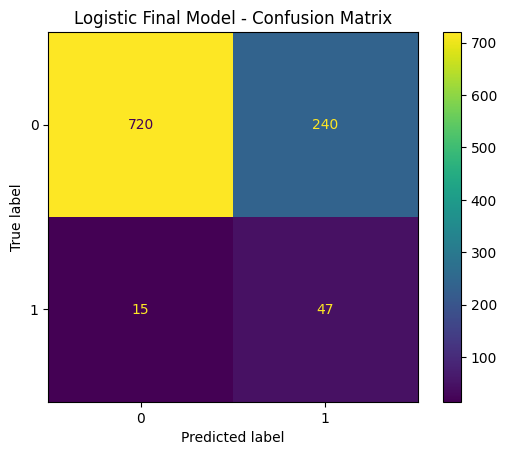

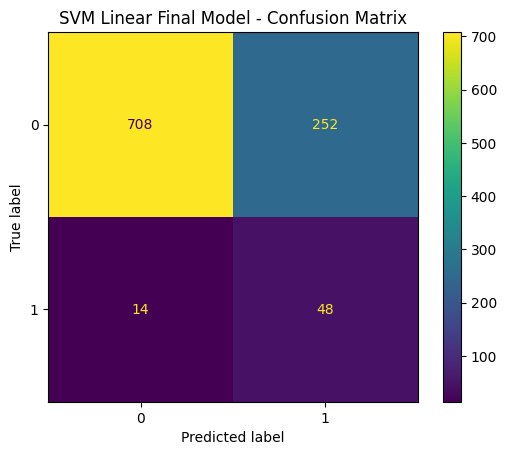

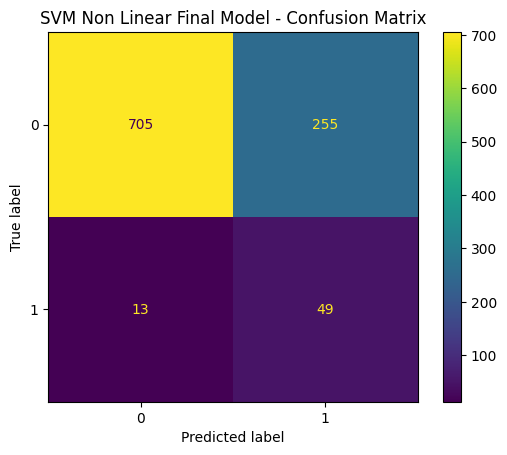

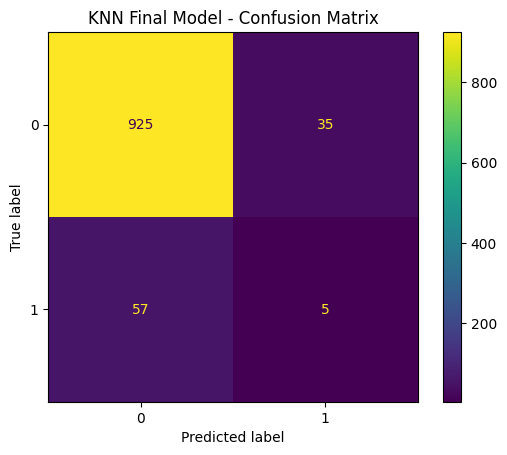

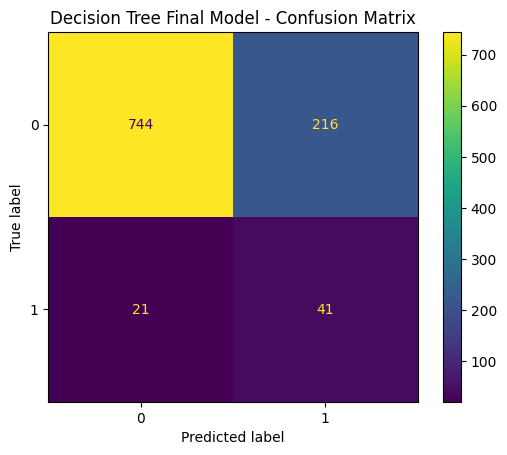

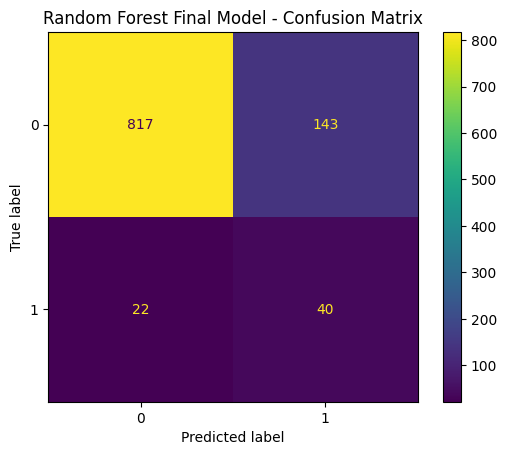

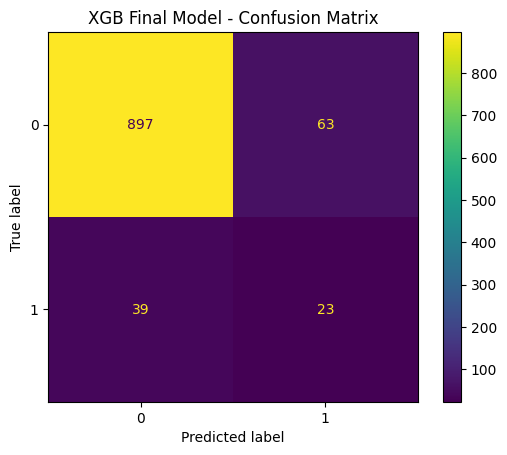

In [ ]:
y_pred_log_final = rs_log.best_estimator_.predict(x_te)
cm_log_final= confusion_matrix(y_te,y_pred_log_final)
m_display_log_final = ConfusionMatrixDisplay(cm_log_final).plot()
plt.title('Logistic Final Model - Confusion Matrix')
plt.show()

y_pred_log_training = rs_log.best_estimator_.predict(x_training)
recall_log_training = recall_score(y_training,y_pred_log_training)
f1_log_training = f1_score(y_training,y_pred_log_training)

recall_log_final = recall_score(y_te,y_pred_log_final)
f1_log_final = f1_score(y_te,y_pred_log_final)


y_pred_svm_lin_final = rs_svm_lin.best_estimator_.predict(x_te)
cm_svm_lin_final= confusion_matrix(y_te,y_pred_svm_lin_final)
m_display_svm_lin_final = ConfusionMatrixDisplay(cm_svm_lin_final).plot()
plt.title('SVM Linear Final Model - Confusion Matrix')
plt.show()

y_pred_svm_lin_training = rs_svm_lin.best_estimator_.predict(x_training)
recall_svm_lin_training = recall_score(y_training,y_pred_svm_lin_training)
f1_svm_lin_training = f1_score(y_training,y_pred_svm_lin_training)

recall_svm_lin_final = recall_score(y_te,y_pred_svm_lin_final)
f1_svm_lin_final = f1_score(y_te,y_pred_svm_lin_final)


y_pred_svm_nonlin_final = rs_svm_nonlin.best_estimator_.predict(x_te)
cm_svm_nonlin_final= confusion_matrix(y_te,y_pred_svm_nonlin_final)
m_display_svm_nonlin_final = ConfusionMatrixDisplay(cm_svm_nonlin_final).plot()
plt.title('SVM Non Linear Final Model - Confusion Matrix')
plt.show()

y_pred_svm_nonlin_training = rs_svm_nonlin.best_estimator_.predict(x_training)
recall_svm_nonlin_training = recall_score(y_training,y_pred_svm_nonlin_training)
f1_svm_nonlin_training = f1_score(y_training,y_pred_svm_nonlin_training)

recall_svm_nonlin_final = recall_score(y_te,y_pred_svm_nonlin_final)
f1_svm_nonlin_final = f1_score(y_te,y_pred_svm_nonlin_final)


y_pred_knn_final = rs_knn.best_estimator_.predict(x_te)
cm_knn_final= confusion_matrix(y_te,y_pred_knn_final)
m_display_knn_final = ConfusionMatrixDisplay(cm_knn_final).plot()
plt.title('KNN Final Model - Confusion Matrix')
plt.show()

y_pred_knn_training = rs_knn.best_estimator_.predict(x_training)
recall_knn_training = recall_score(y_training,y_pred_knn_training)
f1_knn_training = f1_score(y_training,y_pred_knn_training)

recall_knn_final = recall_score(y_te,y_pred_knn_final)
f1_knn_final = f1_score(y_te,y_pred_knn_final)


y_pred_tree_final = rs_tree.best_estimator_.predict(x_te)
cm_tree_final= confusion_matrix(y_te,y_pred_tree_final)
m_display_tree_final = ConfusionMatrixDisplay(cm_tree_final).plot()
plt.title('Decision Tree Final Model - Confusion Matrix')
plt.show()

y_pred_tree_training = rs_tree.best_estimator_.predict(x_training)
recall_tree_training = recall_score(y_training,y_pred_tree_training)
f1_tree_training = f1_score(y_training,y_pred_tree_training)

recall_tree_final = recall_score(y_te,y_pred_tree_final)
f1_tree_final = f1_score(y_te,y_pred_tree_final)


y_pred_forest_final = rs_forest.best_estimator_.predict(x_te)
cm_forest_final= confusion_matrix(y_te,y_pred_forest_final)
m_display_forest_final = ConfusionMatrixDisplay(cm_forest_final).plot()
plt.title('Random Forest Final Model - Confusion Matrix')
plt.show()

y_pred_forest_training = rs_forest.best_estimator_.predict(x_training)
recall_forest_training = recall_score(y_training,y_pred_forest_training)
f1_forest_training = f1_score(y_training,y_pred_forest_training)

recall_forest_final = recall_score(y_te,y_pred_forest_final)
f1_forest_final = f1_score(y_te,y_pred_forest_final)

y_pred_xgb_final = rs_xgb.best_estimator_.predict(x_te)
cm_xgb_final= confusion_matrix(y_te,y_pred_xgb_final)
m_display_xgb_final = ConfusionMatrixDisplay(cm_xgb_final).plot()
plt.title('XGB Final Model - Confusion Matrix')
plt.show()

y_pred_xgb_training = rs_xgb.best_estimator_.predict(x_training)
recall_xgb_training = recall_score(y_training,y_pred_xgb_training)
f1_xgb_training = f1_score(y_training,y_pred_xgb_training)

recall_xgb_final = recall_score(y_te,y_pred_xgb_final)
f1_xgb_final = f1_score(y_te,y_pred_xgb_final)

In [ ]:
print("RECALL TEST")
print("Log       :\t %.2f\t" % (recall_log_final))
print("Svm-lin   :\t %.2f\t" % (recall_svm_lin_final))
print("Svm-nonlin:\t %.2f\t" % (recall_svm_nonlin_final))
print("K-NN      :\t %.2f\t" % (recall_knn_final))
print("Tree      :\t %.2f\t" % (recall_tree_final))
print("Forest    :\t %.2f\t" % (recall_forest_final))
print("Xgb       :\t %.2f\t" % (recall_xgb_final))

RECALL TEST
Log       :	 0.76	
Svm-lin   :	 0.77	
Svm-nonlin:	 0.79	
K-NN      :	 0.08	
Tree      :	 0.66	
Forest    :	 0.65	
Xgb       :	 0.37	


In [ ]:
print("F1 SCORE TEST")
print("Log       :\t %.2f\t" % (f1_log_final))
print("Svm-lin   :\t %.2f\t" % (f1_svm_lin_final))
print("Svm-nonlin:\t %.2f\t" % (f1_svm_nonlin_final))
print("K-NN      :\t %.2f\t" % (f1_knn_final))
print("Tree      :\t %.2f\t" % (f1_tree_final))
print("Forest    :\t %.2f\t" % (f1_forest_final))
print("Xgb       :\t %.2f\t" % (f1_xgb_final))

F1 SCORE TEST
Log       :	 0.27	
Svm-lin   :	 0.27	
Svm-nonlin:	 0.27	
K-NN      :	 0.10	
Tree      :	 0.26	
Forest    :	 0.33	
Xgb       :	 0.31	


Integrating the recall and F1 score results with the accuracy results provides a more comprehensive overview of the model performance.
Models such as Logistic Regression and Support Vector Machines (both linear and non-linear) demonstrate relatively consistent performance across accuracy, recall, and F1 score.

k-Nearest Neighbors (K-NN) shows a low recall and F1 score, suggesting challenges in correctly identifying the class 1.

Decision Tree and Random Forest exhibit good recall, capturing a significant portion of positive cases, but the F1 score indicates a need for improvement in precision.

XGBoost shows moderate recall and F1 score, demonstrating a balanced trade-off between precision and recall.

**COMPARISON**

I decided to print also the outcomes of the previous models to provide an overview of the changes. For the accuracy, I showed results for both training and validation sets. However, for F1 score and recall, I exclusively presented the outcomes obtained during validation.

The first model represents the default configuration, the second is the balanced model, and ultimately, the third model incorporates hyperparameter tuning.
It's important to note that the first two were trained on a subset of the data (x_tr, y_tr) and evaluated on the validation set (x_val, y_val). In contrast, the final model underwent testing on the complete training dataset (x_training, y_training) and evaluated on the test set (x_te, y_te).

In [ ]:
print("ACCURACY COMPARISON:")
print("\t          TR \t VAL \t\tTR BAL\t VAL BAL\tTRAINING TEST")
print(("Log       :\t %.2f\t %.2f" % (model_logistic.score(x_tr, y_tr), model_logistic.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_logistic_bal.score(x_tr, y_tr), model_logistic_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_log.best_estimator_.score(x_training, y_training), rs_log.best_estimator_.score(x_te, y_te))))
print(("SVM-lin   :\t %.2f\t %.2f" % (model_svm_lin.score(x_tr, y_tr), model_svm_lin.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_svm_lin_bal.score(x_tr, y_tr), model_svm_lin_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_svm_lin.best_estimator_.score(x_training, y_training), rs_svm_lin.best_estimator_.score(x_te, y_te))))
print(("SVM-nonlin:\t %.2f\t %.2f" % (model_svm_nonlin.score(x_tr, y_tr), model_svm_nonlin.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_svm_nonlin_bal.score(x_tr, y_tr), model_svm_nonlin_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_svm_nonlin.best_estimator_.score(x_training, y_training), rs_svm_nonlin.best_estimator_.score(x_te, y_te))))
print(("K-NN      :\t %.2f\t %.2f" % (model_knn.score(x_tr, y_tr), model_knn.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_knn_bal.score(x_tr, y_tr), model_knn_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_knn.best_estimator_.score(x_training, y_training), rs_knn.best_estimator_.score(x_te, y_te))))
print(("Tree      :\t %.2f\t %.2f" % (model_tree.score(x_tr, y_tr), model_tree.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_tree_bal.score(x_tr, y_tr), model_tree_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_tree.best_estimator_.score(x_training, y_training), rs_tree.best_estimator_.score(x_te, y_te))))
print(("Forest    :\t %.2f\t %.2f" % (model_forest.score(x_tr, y_tr), model_forest.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (model_forest_bal.score(x_tr, y_tr), model_forest_bal.score(x_val, y_val))),("\t \t %.2f\t %.2f" % (rs_forest.best_estimator_.score(x_training, y_training), rs_forest.best_estimator_.score(x_te, y_te))))
print(("Xgb       :\t %.2f\t %.2f" % (model_xgb.score(x_tr, y_tr), model_xgb.score(x_val, y_val))),("\t \t \t "),("\t \t %.2f\t %.2f" % (rs_xgb.best_estimator_.score(x_training, y_training), rs_xgb.best_estimator_.score(x_te, y_te))))


ACCURACY COMPARISON:
	          TR 	 VAL 		TR BAL	 VAL BAL	TRAINING TEST
Log       :	 0.95	 0.95 	 	 0.74	 0.73 	 	 0.74	 0.75
SVM-lin   :	 0.95	 0.95 	 	 0.73	 0.71 	 	 0.72	 0.74
SVM-nonlin:	 0.95	 0.95 	 	 0.81	 0.78 	 	 0.73	 0.74
K-NN      :	 0.96	 0.95 	 	 1.00	 0.95 	 	 1.00	 0.91
Tree      :	 1.00	 0.90 	 	 1.00	 0.92 	 	 0.76	 0.77
Forest    :	 1.00	 0.95 	 	 1.00	 0.95 	 	 0.84	 0.84
Xgb       :	 0.96	 0.95 	 	 	  	 	 0.90	 0.90


In [ ]:
print("RECALL COMPARISON:")
print("\t \t VAL \tVAL BAL \tTRAINING TEST")
print(("Log       :\t %.2f\t" % (recall_log)),("%.2f\t\t" % (recall_log_bal)),("%.2f\t" % (recall_log_training)),("%.2f\t" % (recall_log_final)))
print(("Svm-lin   :\t %.2f\t" % (recall_svm_lin)),("%.2f\t\t" % (recall_svm_lin_bal)),("%.2f\t" % (recall_svm_lin_training)),("%.2f\t" % (recall_svm_lin_final)))
print(("Svm-nonlin:\t %.2f\t" % (recall_svm_nonlin)),("%.2f\t\t" % (recall_svm_nonlin_bal)),("%.2f\t" % (recall_svm_nonlin_training)),("%.2f\t" % (recall_svm_nonlin_final)))
print(("K-NN      :\t %.2f\t" % (recall_knn)),("%.2f\t\t" % (recall_knn_bal)),("%.2f\t" % (recall_knn_training)),("%.2f\t" % (recall_knn_final)))
print(("Tree      :\t %.2f\t" % (recall_tree)),("%.2f\t\t" % (recall_tree_bal)),("%.2f\t" % (recall_tree_training)),("%.2f\t" % (recall_tree_final)))
print(("Forest    :\t %.2f\t" % (recall_forest)),("%.2f\t\t" % (recall_forest_bal)),("%.2f\t" % (recall_forest_training)),("%.2f\t" % (recall_forest_final)))
print(("Xgb       :\t %.2f\t" % (recall_xgb)), ("\t\t"), ("%.2f\t" % (recall_xgb_training)),("%.2f\t" % (recall_xgb_final)))


RECALL COMPARISON:
	 	 VAL 	VAL BAL 	TRAINING TEST
Log       :	 0.00	 0.76		 0.82	 0.76	
Svm-lin   :	 0.00	 0.76		 0.82	 0.77	
Svm-nonlin:	 0.00	 0.63		 0.84	 0.79	
K-NN      :	 0.00	 0.00		 1.00	 0.08	
Tree      :	 0.13	 0.05		 0.81	 0.66	
Forest    :	 0.03	 0.03		 0.89	 0.65	
Xgb       :	 0.03	 		 0.41	 0.37	


In [ ]:
print("F1 SCORE COMPARISON:")
print("\t \t VAL \tVAL BAL \tTRAINING TEST")
print(("Log       :\t %.2f\t" % (f1_log)),("%.2f\t\t" % (f1_log_bal)),("%.2f\t" % (f1_log_training)),("%.2f\t" % (f1_log_final)))
print(("Svm-lin   :\t %.2f\t" % (f1_svm_lin)),("%.2f\t\t" % (f1_svm_lin_bal)),("%.2f\t" % (f1_svm_lin_training)),("%.2f\t" % (f1_svm_lin_final)))
print(("Svm-nonlin:\t %.2f\t" % (f1_svm_nonlin)),("%.2f\t\t" % (f1_svm_nonlin_bal)),("%.2f\t" % (f1_svm_nonlin_training)),("%.2f\t" % (f1_svm_nonlin_final)))
print(("K-NN      :\t %.2f\t" % (f1_knn)),("%.2f\t\t" % (f1_knn_bal)),("%.2f\t" % (f1_knn_training)),("%.2f\t" % (f1_knn_final)))
print(("Tree      :\t %.2f\t" % (f1_tree)),("%.2f\t\t" % (f1_tree_bal)),("%.2f\t" % (f1_tree_training)),("%.2f\t" % (f1_tree_final)))
print(("Forest    :\t %.2f\t" % (f1_forest)),("%.2f\t\t" % (f1_forest_bal)),("%.2f\t" % (f1_forest_training)),("%.2f\t" % (f1_forest_final)))
print(("Xgb       :\t %.2f\t" % (f1_xgb)),("\t\t"), ("%.2f\t" % (f1_xgb_training)),("%.2f\t" % (f1_xgb_final)))

F1 SCORE COMPARISON:
	 	 VAL 	VAL BAL 	TRAINING TEST
Log       :	 0.00	 0.21		 0.22	 0.27	
Svm-lin   :	 0.00	 0.20		 0.21	 0.27	
Svm-nonlin:	 0.00	 0.21		 0.22	 0.27	
K-NN      :	 0.00	 0.00		 1.00	 0.10	
Tree      :	 0.11	 0.06		 0.24	 0.26	
Forest    :	 0.05	 0.05		 0.33	 0.33	
Xgb       :	 0.05	 		 0.27	 0.31	


**Default Configuration:**

All models demonstrated high accuracy on both training and validation sets in their default configurations.
On the other hand recall and f1 score are really low.

**Balanced Configuration:**

The introduction of a balanced approach resulted in decreases in accuracy for the logistic, svm linear and non linear, particularly noticeable on the validation set. At the same time the F1 score and the recall improved.
On the other hand the weighted loss function seemed to have no effect on the knn, decision tree and random forest. In fact, their accuracy, f1 score and recall remained almost the same of the default configuration.

**Tuned Configuration:**

The first tree models (Logistic regression, Support Vector Machine Linear and Non Linear) undergoing hyperparameter tuning exhibited an improvement in all the three metrics.

Once again for the k-Nearest Neighbors there was almost no change from the previous configurations.

On the contrary, a radical change happened for the Decision Tree, Random Forest and Gradient Boosting models, emphasizing the impact of hyperparameters-tuning. In fact, although their accuracy slightly decreased (but is still higher than the other models), their recall and F1 score improved.

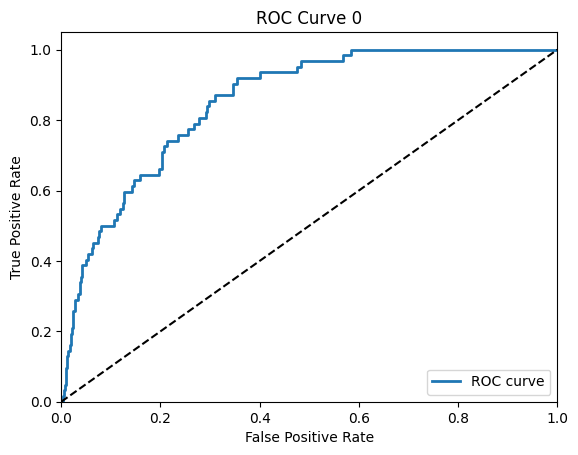

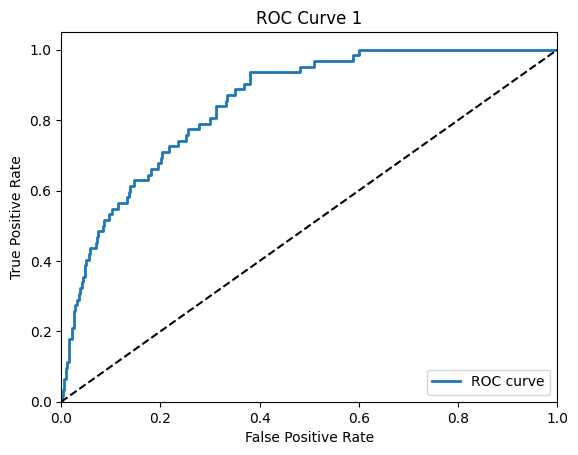

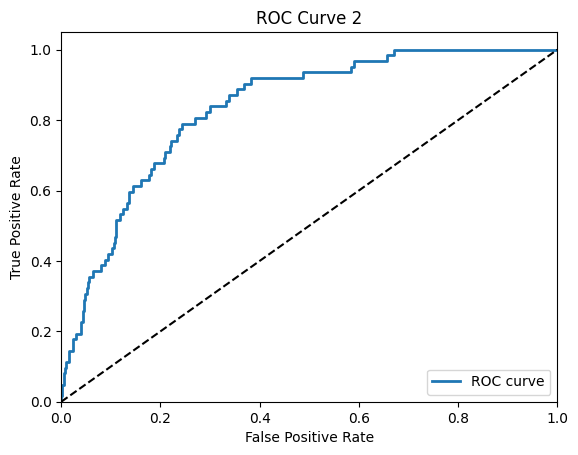

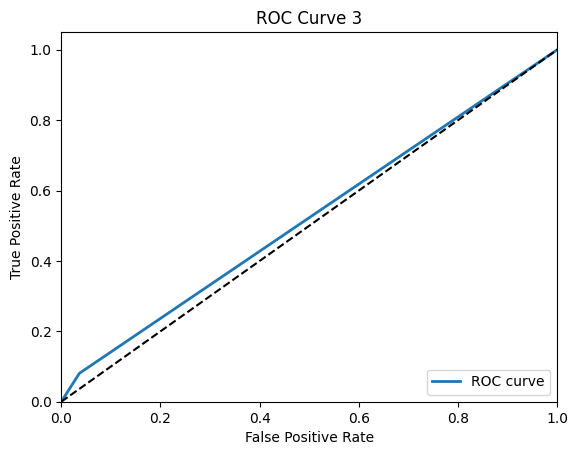

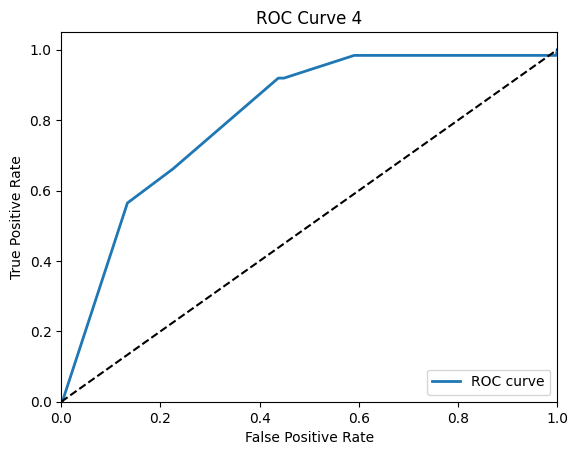

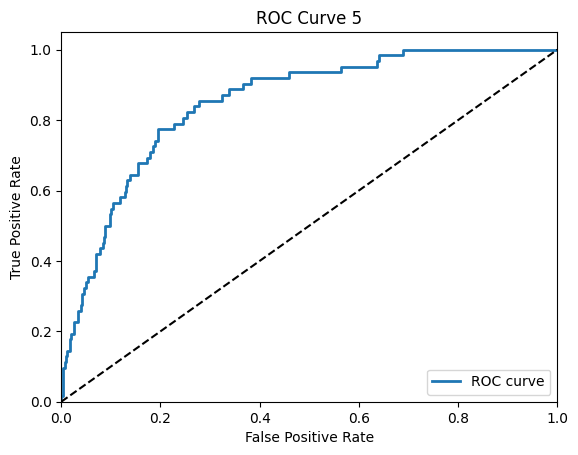

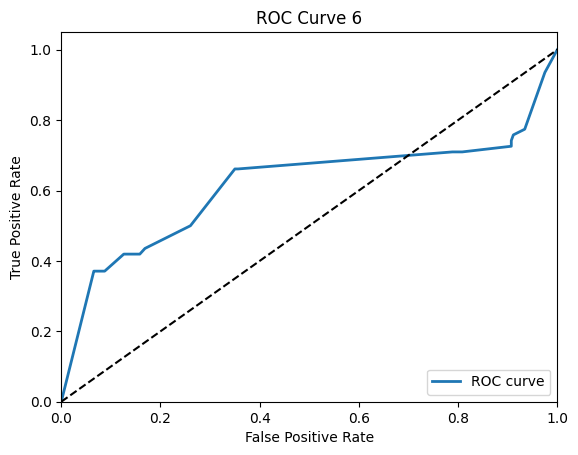

In [ ]:
y_log_final_pred =  rs_log.best_estimator_.predict_proba(x_te) [::,1]
y_svm_lin_final_pred = rs_svm_lin.best_estimator_.predict_proba(x_te)[::,1]
y_svm_nonlin_final_pred = rs_svm_nonlin.best_estimator_.predict_proba(x_te)[::,1]
y_knn_final_pred = rs_knn.best_estimator_.predict_proba(x_te)[::,1]
y_tree_final_pred = rs_tree.best_estimator_.predict_proba(x_te)[::,1]
y_forest_final_pred = rs_forest.best_estimator_.predict_proba(x_te)[::,1]
y_xgb_final_pred =  rs_xgb.best_estimator_.predict_proba(x_te) [::,1]


y_final_PRED = [y_log_final_pred, y_svm_lin_final_pred, y_svm_nonlin_final_pred, y_knn_final_pred, y_tree_final_pred, y_forest_final_pred, y_xgb_final_pred]

fpr_log_final = dict()
fpr_svm_lin_final = dict()
fpr_svm_non_lin_final = dict()
fpr_knn_final = dict()
fpr_tree_final = dict()
fpr_forest_final = dict()
fpr_xgb_final = dict()

FPR_final = [fpr_log_final, fpr_svm_lin_final, fpr_svm_non_lin_final, fpr_knn_final, fpr_tree_final, fpr_forest_final, fpr_xgb_final]

tpr_log_final = dict()
tpr_svm_lin_final = dict()
tpr_svm_non_lin_final = dict()
tpr_knn_final= dict()
tpr_tree_final = dict()
tpr_forest_final = dict()
tpr_xgb_final = dict()

TPR_final = [tpr_log_final, tpr_svm_lin_final, tpr_svm_non_lin_final, tpr_knn_final, tpr_tree_final, tpr_forest_final, tpr_xgb_final]

for i in range(7):
    FPR_final[i], TPR_final[i], _ = roc_curve(y_te, y_final_PRED[i])
    plt.plot(FPR_final[i], TPR_final[i], lw=2, label="ROC curve")

    plt.plot([0, 1], [0, 1], color="k", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve {}".format(i))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
for i in range(7):
    auc_score = roc_auc_score(y_te, y_final_PRED[i])
    print("AUC Score {}: {:.2f}".format(i, auc_score))


AUC Score 0: 0.85
AUC Score 1: 0.85
AUC Score 2: 0.83
AUC Score 3: 0.52
AUC Score 4: 0.81
AUC Score 5: 0.85
AUC Score 6: 0.61


AUC Score 0: Logistic Regression

AUC Score 1: Linear Support Vector Machine

AUC Score 2: Non-Linear Support Vector Machine

AUC Score 3: K-Nearest Neighbors

AUC Score 4: Decision Tree

AUC Score 5: Random forest

AUC Score 6: Gradient Boosting

The ROC curves with the corresponding AUC scores provide a visual and quantitative evaluation of the performance

Logistic Model, Linear SVM and Random forest achieved the best AUC
Score (0.85), indicating an excellent trade-off between true positive rate and false positive rate. The model effectively separates the classes.

For the non-linear SVM and the Decision Tree model, the AUC score, respectively of 0.83 and 0.81, is slightly lower.
It still indicates a good discrimination.

The ROC curve for XGBoost corresponds to a lower AUC of 0.61, indicating challenges in discrimination.
The ROC curve for the KNN model is the worst and it is equal to a score of a random classifier.

To sum up, considering all the evaluation metrics, I can conclude that all the models, except for KNN, achieved good (but not perfect) performance.
The choice of the "best" model depends on the specific goals of the task. If identifying positive cases (recall) is crucial, SVM Non-Linear might be preferred. For a balanced trade-off between precision and recall, Random Forest with the highest F1 score could be considered. If maximizing accuracy is the priority, XGBoost may be the choice.

**CONSIDERATIONS**:
There are a couple of aspects I would have considered changing.
Firstly, I didn't balance the gradient boosting model, and incorporating balancing might have enhanced its performance.
Secondly, regarding the selection of hyperparameters, I didn't adhere to a strict and precise criterion. I opted for a more casual approach, relying on trial-and-error techniques. Given the promising outcomes with the decision tree and random forest, a more systematic exploration could potentially have allowed better results.


**LIMIT:** All the variables have been standardized. This step wasn't necessary for the categorical variables.